# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea;text-align:center">                      ** Project: Star Hotels **<br>
    By: Syeda Ambreen Karim Bokhari

# Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be cancelled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [469]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [470]:
data=pd.read_csv('StarHotelsGroup.csv')

In [471]:
df_copy=data.copy()

## Data Overview

- Observations
- Sanity checks

In [472]:
data.sample(5)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
20148             2               0                     2                  3   
29751             2               0                     1                  0   
56304             2               0                     1                  1   
555               2               0                     0                  1   
42478             2               0                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
20148       Meal Plan 1                           0        Room_Type 1   
29751       Meal Plan 1                           0        Room_Type 1   
56304       Meal Plan 1                           0        Room_Type 1   
555         Meal Plan 1                           0        Room_Type 4   
42478       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
20148         40          2018              5            21   
29751         12          2017             10             4   
56304         26          2019              2             4   
555           66          2017             11            19   
42478         97          2018              4            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
20148              Online               0                             0   
29751             Offline               0                             0   
56304              Online               0                             0   
555                Online               0                             0   
42478              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
20148                                     0              126.90   
29751                                     0               72.00   
56304                                     0               90.00   
555                                       0               81.90   
42478                                     0              109.81   

       no_of_special_requests booking_status  
20148                       0       Canceled  
29751                       0   Not_Canceled  
56304                       0   Not_Canceled  
555                         2   Not_Canceled  
42478                       1   Not_Canceled

In [473]:
data.shape

(56926, 18)

In [474]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

### Observations
* There are 56926 records and 18 columns.
* Four columns are object. Target variable: 
* Target variable booking_status is also object but will need to be converted to boolean.
* avg_price_per_room is the only float64 variable
* other variables have int64 data type.
* Arrival date, month and year can be combined to get single date and to reduce dimensiality.

## Checking for missing values

In [476]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values

## Finding and removing duplicates

In [477]:
data[data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

* There are 14350 duplicate records
* We will drop the duplicates

In [478]:
data.drop_duplicates(inplace=True)

In [479]:
data.shape

(42576, 18)

* dataset has 42576 rows and 18 columns now

In [480]:
df=data.copy()

#### Converting object variables to category

In [481]:
# Make catagorical variable into catagory.
data['type_of_meal_plan']=data.type_of_meal_plan.astype('category')
data['room_type_reserved']=data.room_type_reserved.astype('category')
data['market_segment_type']=data.market_segment_type.astype('category')
data['booking_status']=data.booking_status.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

### Statistical Summary of dataset

In [482]:
data.describe().T

count         mean        std     min  \
no_of_adults                          42576.0     1.916737   0.527524     0.0   
no_of_children                        42576.0     0.142146   0.459920     0.0   
no_of_weekend_nights                  42576.0     0.895270   0.887864     0.0   
no_of_week_nights                     42576.0     2.321167   1.519328     0.0   
required_car_parking_space            42576.0     0.034362   0.182160     0.0   
lead_time                             42576.0    77.315953  77.279616     0.0   
arrival_year                          42576.0  2018.297891   0.626126  2017.0   
arrival_month                         42576.0     6.365488   3.051924     1.0   
arrival_date                          42576.0    15.682873   8.813991     1.0   
repeated_guest                        42576.0     0.030886   0.173011     0.0   
no_of_previous_cancellations          42576.0     0.025413   0.358194     0.0   
no_of_previous_bookings_not_canceled  42576.0     0.222731   2.242308     0.0   
avg_price_per_room                    42576.0   112.375800  40.865896     0.0   
no_of_special_requests                42576.0     0.768109   0.837264     0.0   

                                         25%     50%     75%     max  
no_of_adults                             2.0     2.0     2.0     4.0  
no_of_children                           0.0     0.0     0.0    10.0  
no_of_weekend_nights                     0.0     1.0     2.0     8.0  
no_of_week_nights                        1.0     2.0     3.0    17.0  
required_car_parking_space               0.0     0.0     0.0     1.0  
lead_time                               16.0    53.0   118.0   521.0  
arrival_year                          2018.0  2018.0  2019.0  2019.0  
arrival_month                            4.0     6.0     9.0    12.0  
arrival_date                             8.0    16.0    23.0    31.0  
repeated_guest                           0.0     0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
avg_price_per_room                      85.5   107.0   135.0   540.0  
no_of_special_requests                   0.0     1.0     1.0     5.0

#### Observations:
- no_of_adults: minimum 0 persons , maximum: 4 persons, 75% : 2 persons, discrete variable.
- no_of_children: minimum 0 persons , maximum: 10 persons, 75% : 0 persons, discrete variable.
- no_of_weekend_nights: minimum 0 nights , maximum: 8 nights, 75% : 2 persons, discrete variable.
- no_of_week_nights: minimum 0 nights , maximum: 17 nights, 75% : 3 persons, discrete variable.
- required_car_parking_space: minimum 0  , maximum: 1 , boolean variable.
- lead_time: minimum 0 days , maximum: 521 days, 75% : below 118 days, 50%: between:16 and 118 days, discrete variable.
- repeated_guest: minimum 0  , maximum: 1 , boolean variable.
- no_of_previous_cancellations: minimum 0 days , maximum: 521 days, 75% : below 118 days, 50%: between:16 and 118 days, discrete variable.
- no_of_previous_bookings_not_canceled: minimum 0 days , maximum: 521 days, 75% : below 118 days, 50%: between:16 and 118 days, discrete variable.
- avg_price_per_room: minimum 0 Euros , maximum: 540 Euros, 75% : below 135 Euros, 50%: between:85 and 135 Euros, currency variable.
- no_of_special_requests: minimum 0 , maximum: 5 , 75% : below 1 , discrete variable.
- arrival_year: data from year 2017 to 2019, 50% data is between 2018 and 2019 nominal data
- arrival_month: months from 1 to 12
- arrival_date: dates from 1 to 31

In [483]:
data.describe(include='category').T

count unique           top   freq
type_of_meal_plan    42576      4   Meal Plan 1  31863
room_type_reserved   42576      7   Room_Type 1  29730
market_segment_type  42576      5        Online  34169
booking_status       42576      2  Not_Canceled  28089

#### Observations on Categorical variables:
- booking_status: 2 unique values, most frequent is Not_Canceled.
- type_of_meal_plan: 4 unique values, most frequent is Meal Plan 1.
- room_type_reserved: 7 unique values, most frequent is Room_Type 1.
- market_segment_type: 5 unique values, most frequent is Online.

In [484]:
data.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       9
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                397
arrival_year                               3
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      73
avg_price_per_room                      4939
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [485]:
# filtering object type columns
cat_columns = data.describe(include=["category"]).columns
cat_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [486]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    28089
Canceled        14487
Name: booking_status, dtype: int64
**************************************************


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Exploratory Data Analysis

## Exploratory Data Analysis (EDA)
- A thorough analysis of the data, in addition to the questions mentioned below are answered.

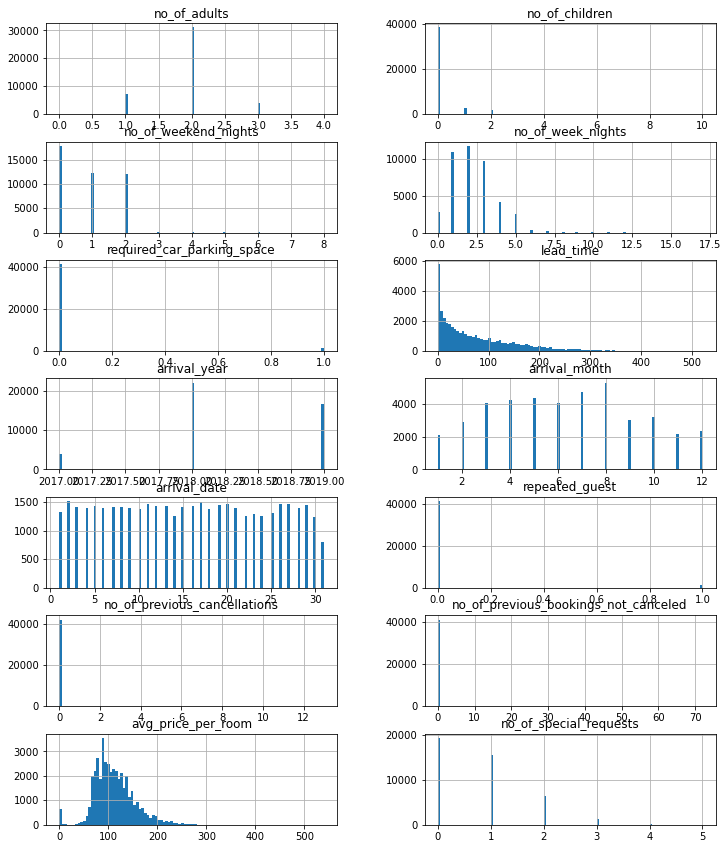

In [165]:
columns1 = list(data)[0:-1] # Excluding Outcome column which has only 
data[columns1].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

* lead_time has right skewed distribution.
* avg_price_per_room has right skewed distribution.
* no_of_special_requests has right skewed distribution.
* no_of_week_nights has right skewed distribution
* no_of_previous_cancellations:has right skewed distribution
* no_of_previous_bookings_not_canceled: has right skewed distribution
* It indicates presence of outliers.

In [487]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

In [488]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)
#dist_box_violin(enews.time_spent_on_the_page)

In [489]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="winter",
        order=data[feature].value_counts().index[:n].sort_values(),
        )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Exploratory Data Analysis

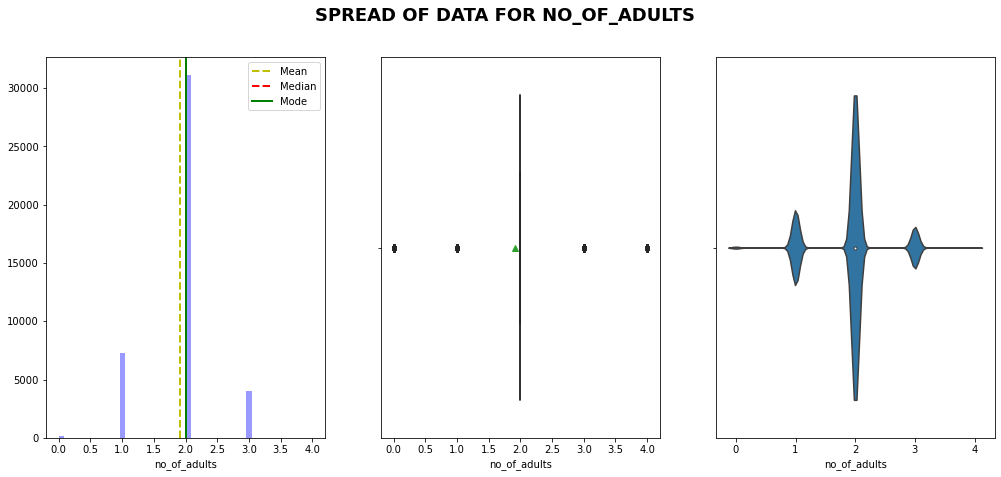

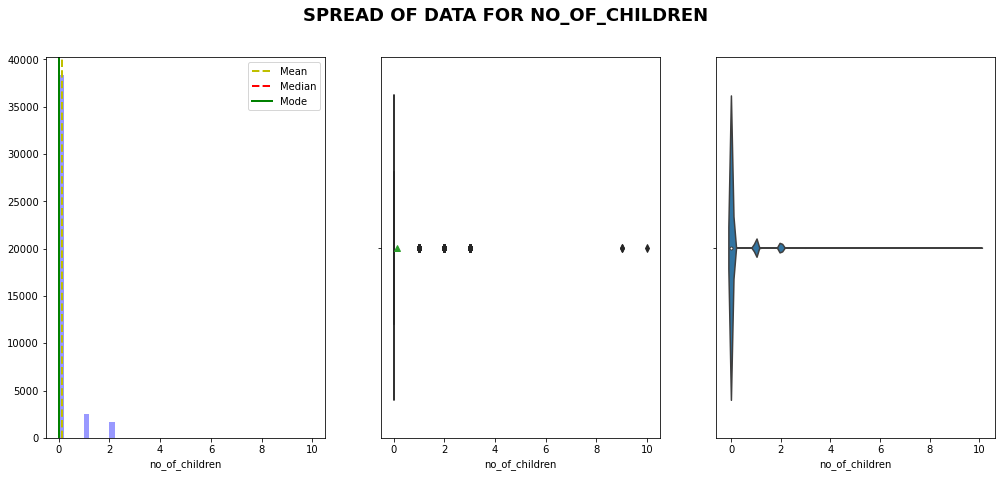

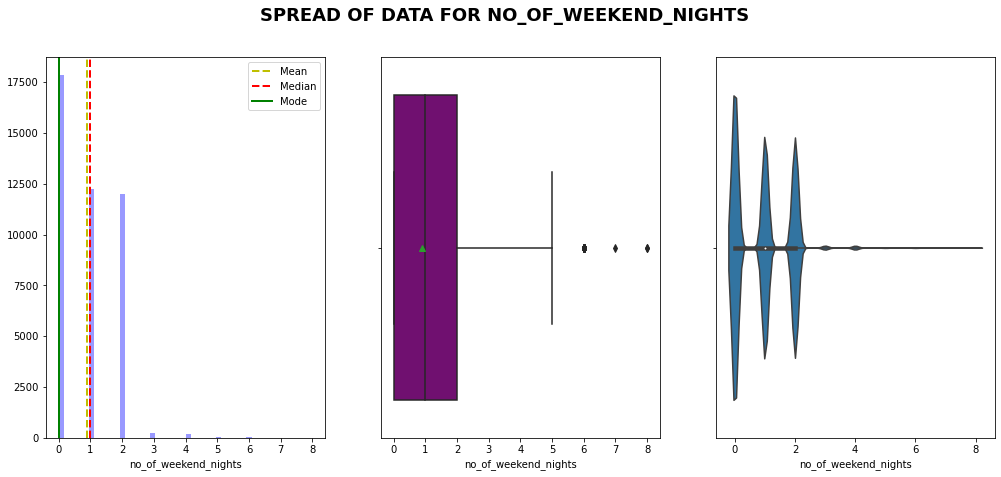

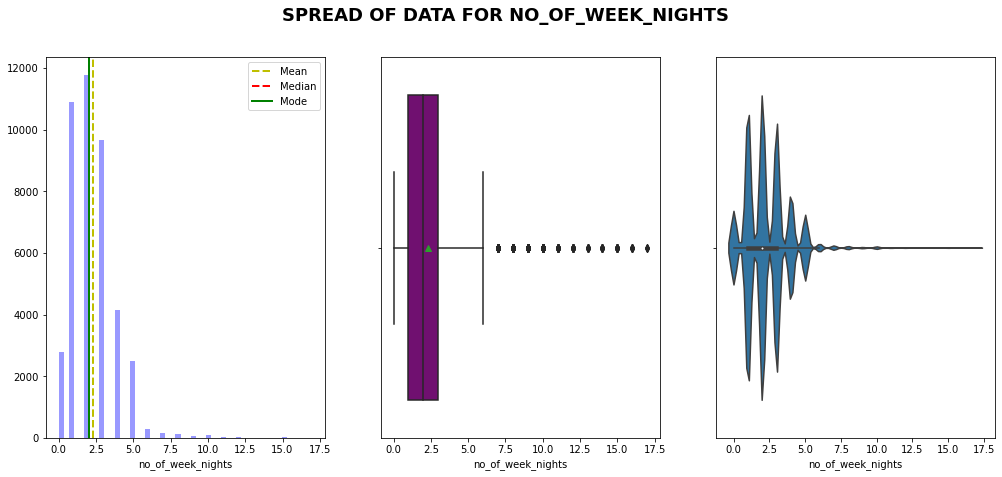

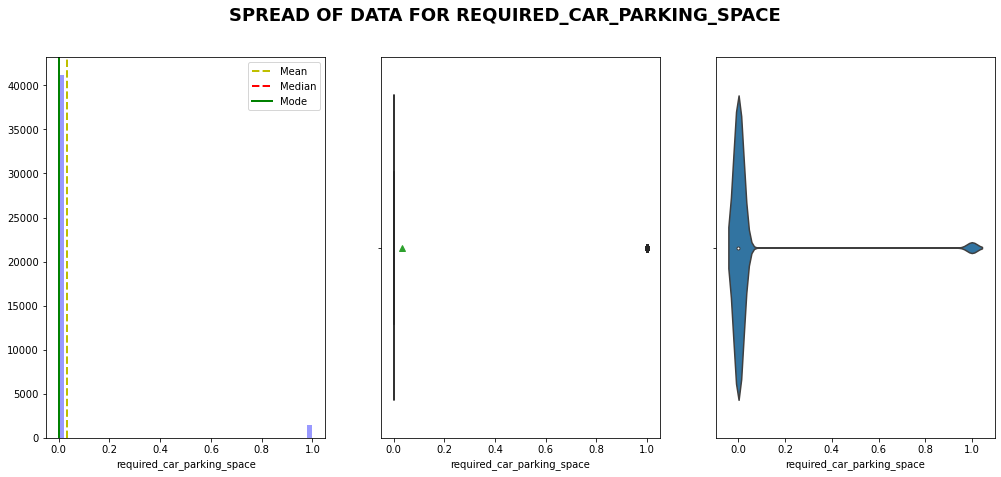

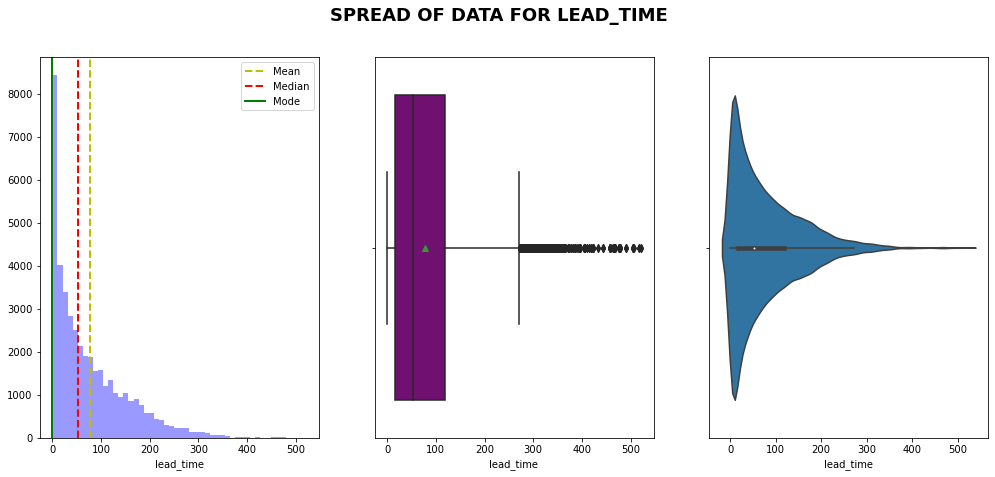

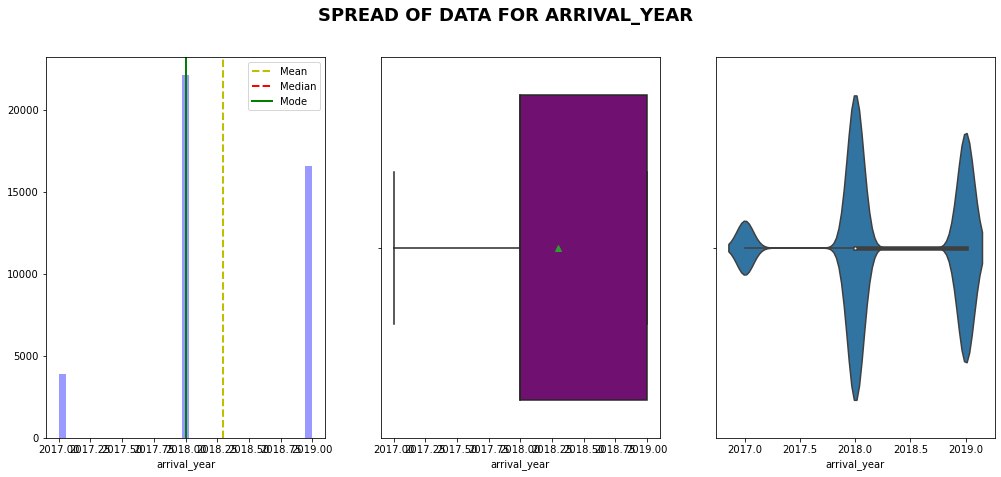

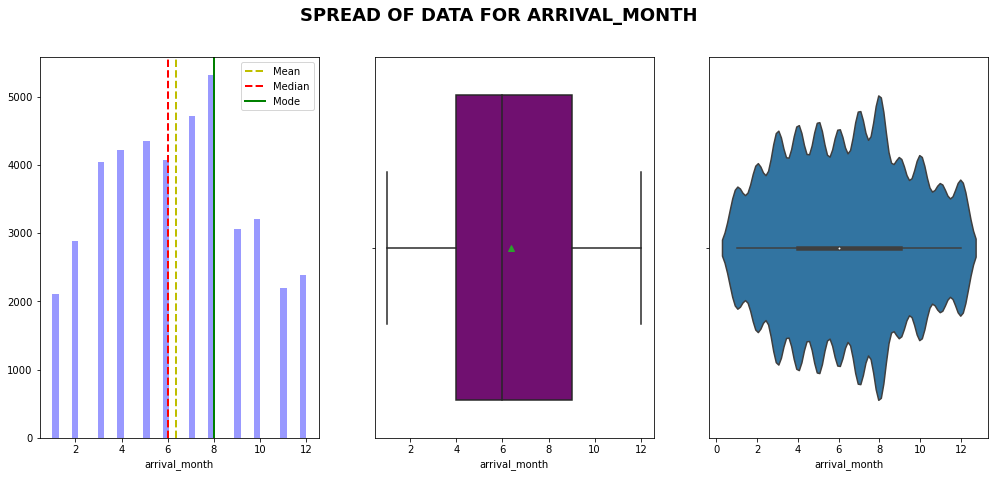

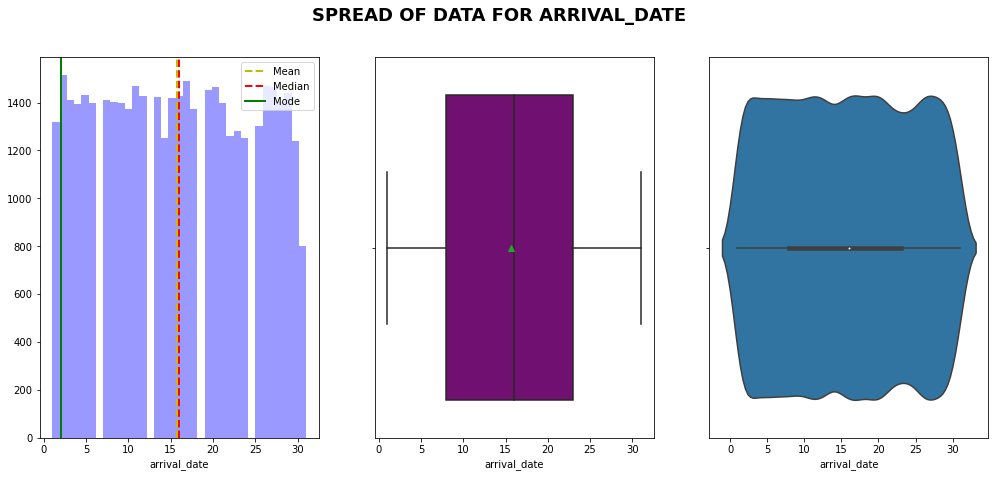

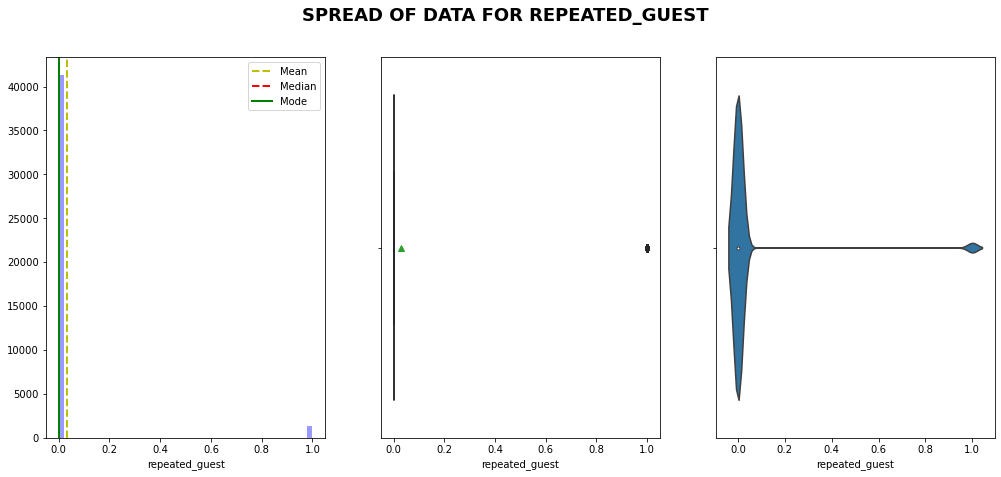

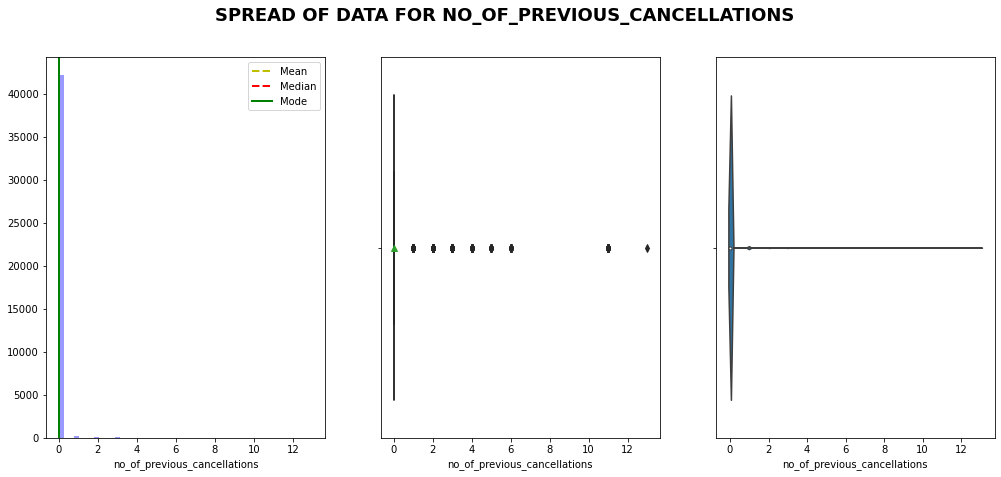

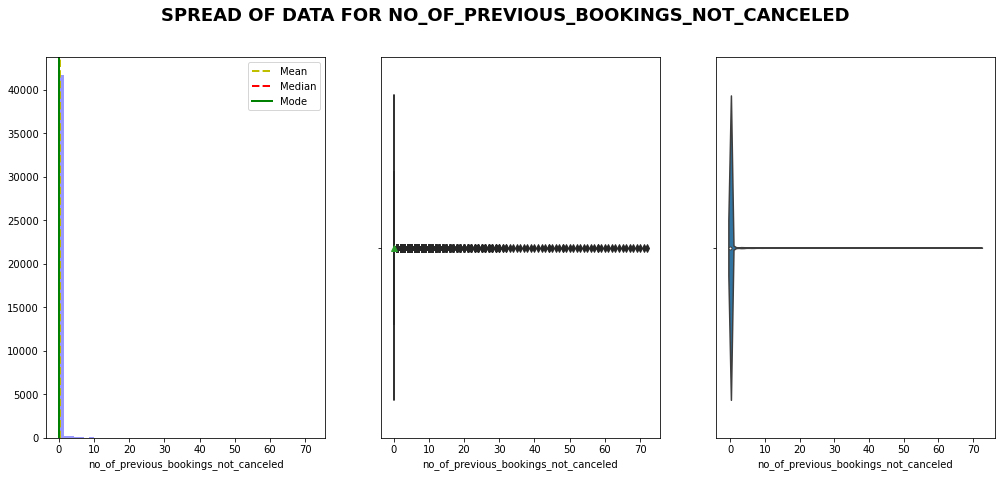

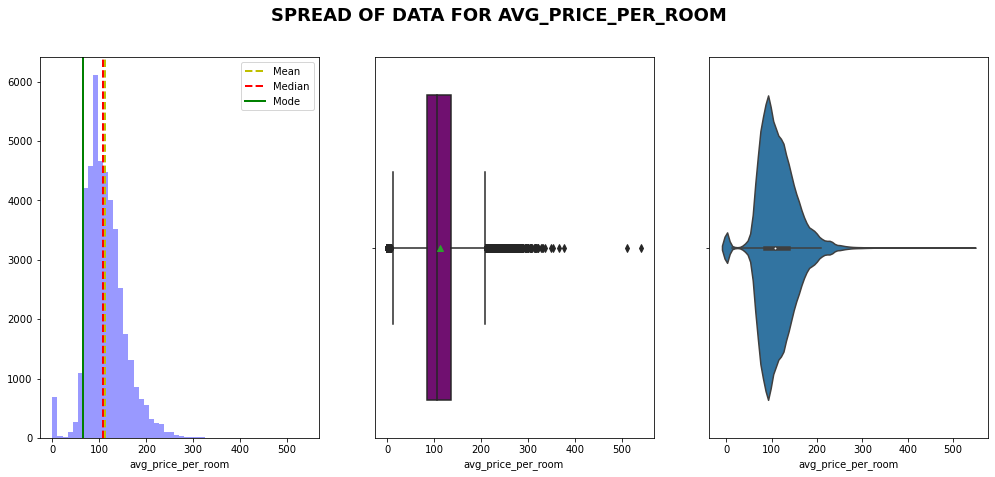

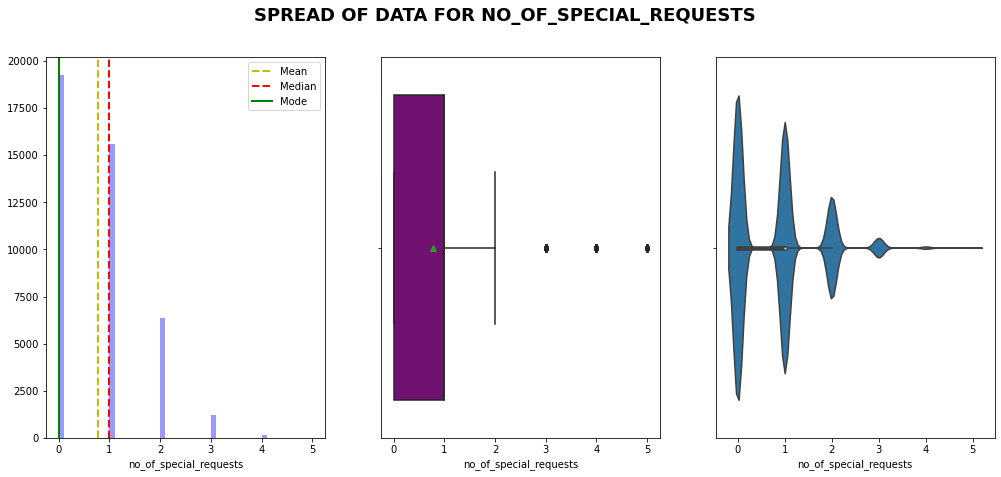

In [490]:
col_list1=['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
for i in col_list1:
    dist_box_violin(data[i])

In [170]:
cat_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

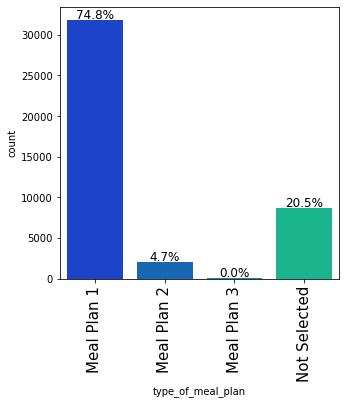

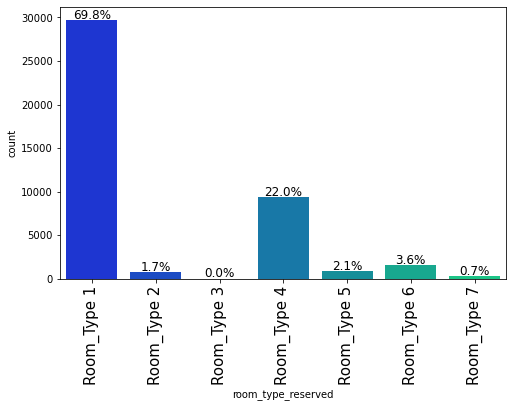

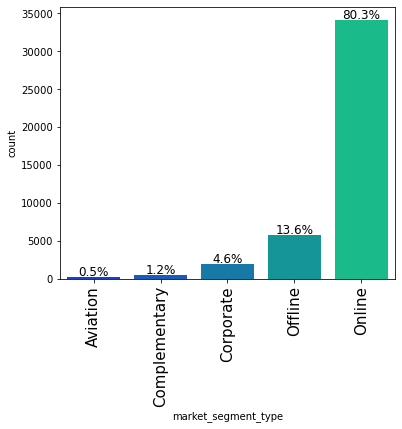

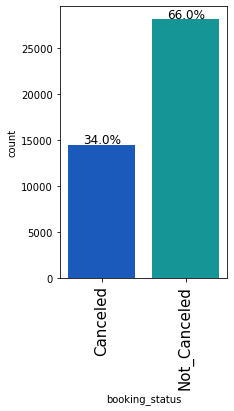

In [171]:
list_col=cat_columns
for i in range(len(list_col)):
    #plt.title=list_col[i].upper()
    labeled_barplot(data, list_col[i], perc=True)
    

#### Observations on Categorical Variables
* booking status has 34% Cancelled and 66% Not_Cancelled
* Majority data: 74.8% has Meal_Plan 1, 20.5% has Not_Selected and 0% is Meal plan 3.
* Majority data : 69.8% is Room type1, Room type4 has 22% and Room type3 has 0%
* Majority market segment: 80.3% is online,13.6% is offline and 0.5% is Aviation

In [491]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [492]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Bivariate Exploratory Data Analysis

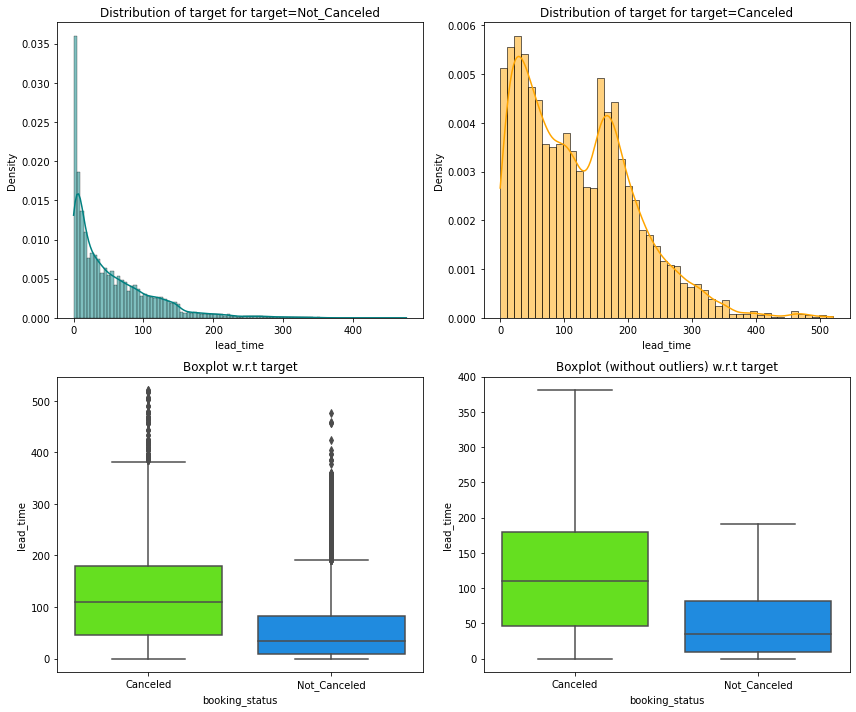

In [493]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

In [494]:
#axis=sns.countplot(x='release_year', data=cell ,palette='plasma').set(title='release_year')
#bar_perc(axis,['release_year'])
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
# percentage of products
#ax = sns.countplot(cell['release_year'],palette='plasma')
#plt.title('Percentage of cell phones with years')
#plt.xlabel('Release Year')
#plt.ylabel('Count')
#bar_perc(ax,cell['release_year'])

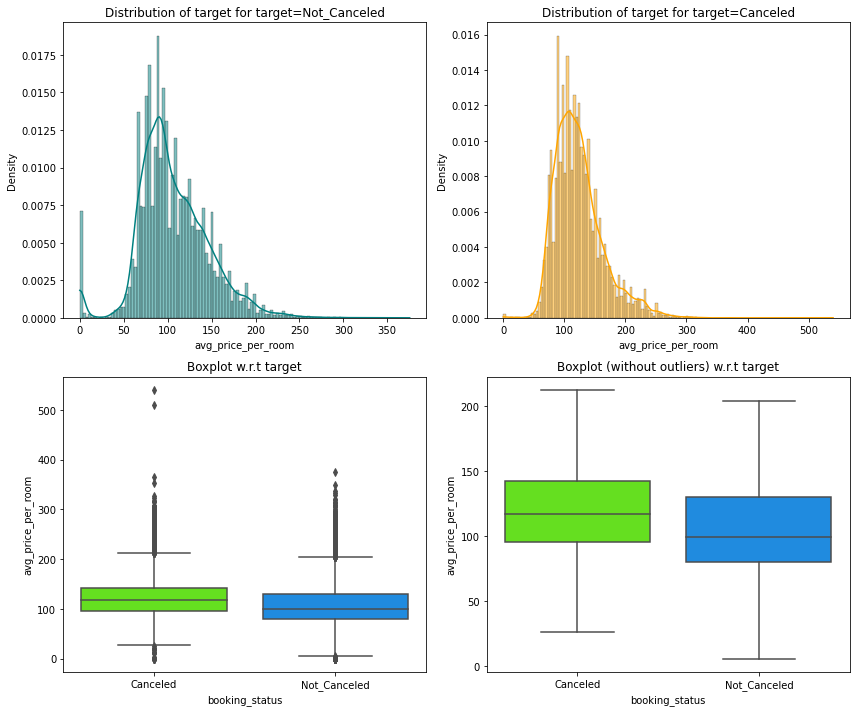

In [495]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Q1. What are the busiest months in the hotel?

In [177]:
## Q1. What are the busiest months in the hotel?
data['arrival_month'].value_counts().sort_values(ascending=False)

8     5312
7     4725
5     4348
4     4227
6     4073
3     4044
10    3209
9     3057
2     2889
12    2385
11    2192
1     2115
Name: arrival_month, dtype: int64

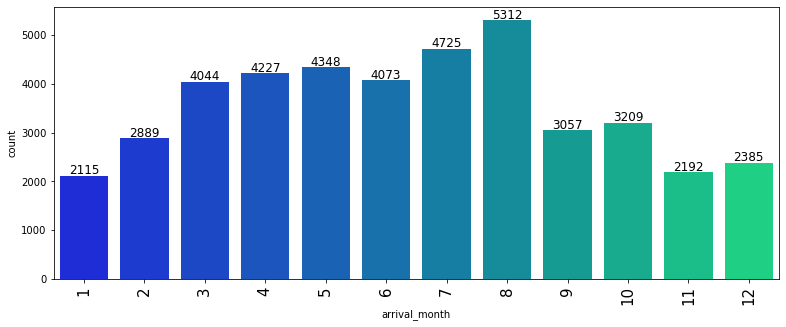

In [178]:
labeled_barplot(data, "arrival_month")

### Observations:
* August is the busiest month with 5312 entries
* July is 2nd busiest with 4725 entries
* January is the least busiest month.

## Q2. Which market segment do most of the guests come from?

In [179]:
## Q2. Which market segment do most of the guests come from?
# Frequency table for Product
market= pd.crosstab(index=data['market_segment_type'], columns='count')
market

col_0                count
market_segment_type       
Aviation               195
Complementary          496
Corporate             1939
Offline               5777
Online               34169

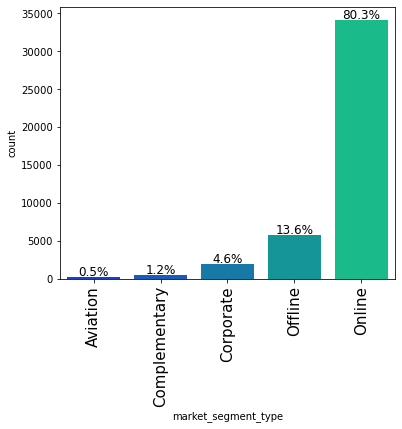

In [180]:
labeled_barplot(data, "market_segment_type", perc=True)

* Most of the guest , 80.3% come from online market segment.
* 13.6% come from offline market segment
* Only 4.5% from corporate, 1.2% from complementary and 0.5% come from Aviation market segment.

In [181]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    
#fig1, axes1 =plt.subplots(1,3,figsize=(14,5))
#list_col=['os', 'four_g', 'five_g']
j=0
#for i in range(len(list_col)):
 #   order = cell[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
#    axis=sns.countplot(x=list_col[i], data=cell , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper())
#    bar_perc(axes1[i],cell[list_col[i]])

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     14487         28089  42576
Online                  13483         20686  34169
Offline                   804          4973   5777
Corporate                 167          1772   1939
Aviation                   33           162    195
Complementary               0           496    496
------------------------------------------------------------------------------------------------------------------------


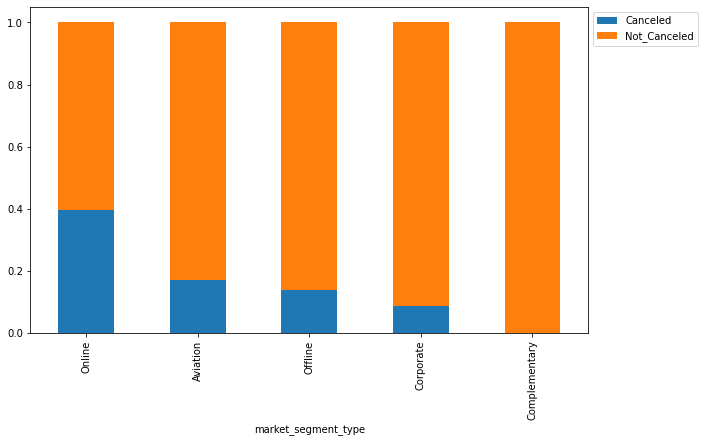

In [182]:
stacked_barplot(data, "market_segment_type", "booking_status")

* As online market segment is outclassing others, cancellations are also mostly from online market.
* Complimentary has no cancellation.

## Q3. What are the differences in room prices in different market segments?

In [86]:
## Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

# Crosstable showing relationship of market_segment_type  by avg_price_per_room
pd.crosstab(data.market_segment_type, data.avg_price_per_room)

avg_price_per_room   0.00    0.50    1.00    1.48    1.60    2.00    3.00    \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary           457       0       2       0       1       3       2   
Corporate                 0       0       0       0       0       0       0   
Offline                   0       0       0       0       0       0       0   
Online                  184       1       6       1       0       2       1   

avg_price_per_room   4.50    6.00    6.50    6.67    9.00    12.00   14.00   \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary             1       6       1       0       3       0       0   
Corporate                 0       0       0       0       0       0       0   
Offline                   0       0       0       0       0       6       0   
Online                    0      20       0       1       3      19       1   

avg_price_per_room   15.00   18.00   18.60   19.15   20.00   22.00   23.00   \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary             0       0       0       0       2       0       0   
Corporate                 0       0       0       0       0       0       0   
Offline                   0       0       0       1       0       1       1   
Online                    4       3       1       1       0       0       1   

avg_price_per_room   24.83   24.87   26.35   29.00   31.00   32.50   32.71   \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary             0       0       0       1       0       0       0   
Corporate                 0       0       0       0       6       0       0   
Offline                   0       0       1       0       2       1       1   
Online                    1       1       0       0       0       0       0   

avg_price_per_room   35.00   35.20   36.25   36.38   37.07   37.33   37.50   \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary             1       0       0       0       0       1       0   
Corporate                 0       0       0       0       0       0       0   
Offline                   1       0       6       1       1       3       3   
Online                    0       1       1       0       0       1       0   

avg_price_per_room   38.00   38.33   38.67   39.00   39.60   39.67   40.00   \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary             0       0       0       0       0       0       0   
Corporate                 0       0       0       0       0       0      14   
Offline                   1       1      16       3       0       0       3   
Online                    0       0       0       0       1       1       0   

avg_price_per_room   40.50   40.67   41.00   41.43   41.76   41.84   41.88   \
market_segment_type                                                           
Aviation                  0       0       0       0       0       0       0   
Complementary             0       0       0       0       0       0       0   
Corporate                 0       0       4       0       0       0       0   
Offline                   1      11       1       4       1       0       1   
Online                    0       0       0       0       0       1       0   

avg_price_per_room   42.00   42.17   42.28   42.50   43.00   43.20   43.33   \
market_segment_type                        

In [87]:
## Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

data.groupby('market_segment_type')['avg_price_per_room'].mean()#.reset_index()

market_segment_type
Aviation         103.234256
Complementary      2.773044
Corporate         82.486086
Offline           87.675326
Online           119.891277
Name: avg_price_per_room, dtype: float64

- Online market has the highest average room price: ~120. It may be because majority data is from online market.
- Aviation has ~103
- Complementary      2.8
- Corporate         82.5
- Offline           87.7


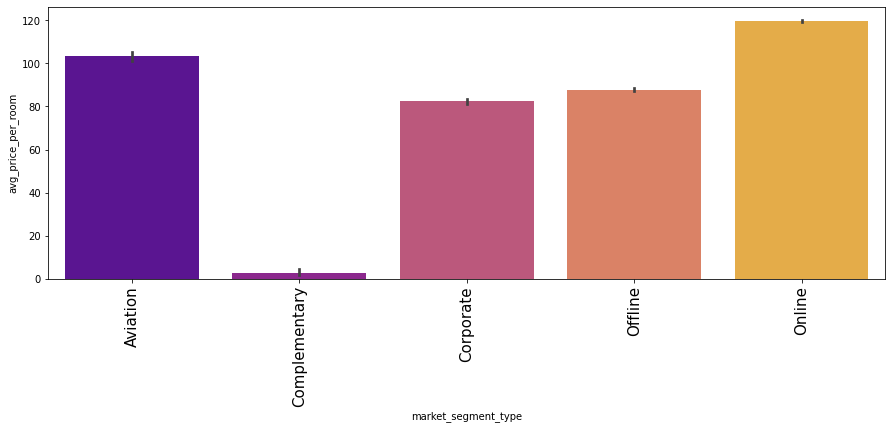

In [88]:
# relationship between market_segment_type and avg_price_per_room
plt.figure(figsize=(15, 5))
sns.barplot('market_segment_type', 'avg_price_per_room', data=data, palette='plasma');
plt.xticks(rotation=90, fontsize=15);

* Online market has the highest average room price.
* Aviation has second highest average room price.
* Complimentary has the lowest average room price, which is understandable as its compimentary.

## Q4. What percentage of bookings are canceled?

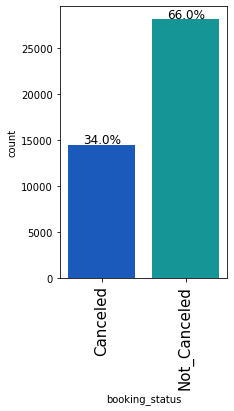

In [89]:
# Q 4. What percentage of bookings are canceled?

labeled_barplot(data, 'booking_status', perc=True)#data,

* 34% bookings are concelled
* 66% bookings are not cancelled.

## Q5. What percentage of repeating guests cancel?

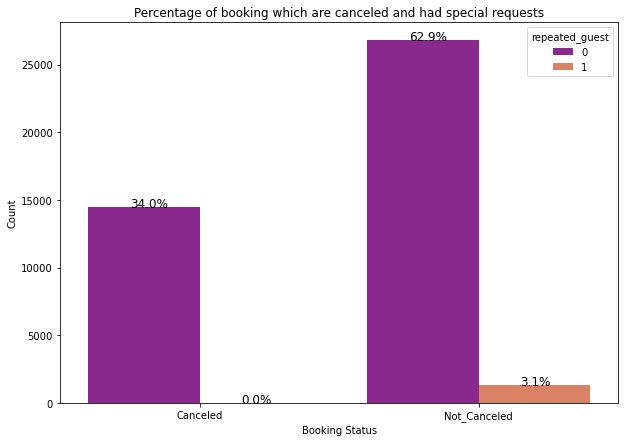

In [90]:
## Q5. What percentage of repeating guests cancel?
plt.figure(figsize=(10,7))
ax = sns.countplot(data['booking_status'],palette='plasma', hue=data['repeated_guest'])
plt.title('Percentage of booking which are canceled and had special requests')
plt.xlabel('Booking Status')
plt.ylabel('Count')
bar_perc(ax,data['booking_status'])

In [91]:
data.groupby('booking_status')['repeated_guest'].count()#.reset_index()

booking_status
Canceled        14487
Not_Canceled    28089
Name: repeated_guest, dtype: int64

In [92]:
pd.crosstab(data.booking_status, data.repeated_guest).sum()

repeated_guest
0    41261
1     1315
dtype: int64

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                14487         28089  42576
0                  14477         26784  41261
1                     10          1305   1315
------------------------------------------------------------------------------------------------------------------------


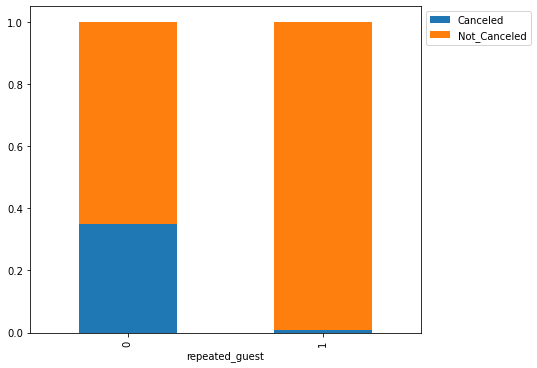

In [93]:
stacked_barplot(data, "repeated_guest", "booking_status")

* All 34% bookings which were cancelled were not repeated guests.
* Majority bookings, 62.9% which were not cancelled were also not repeated guests.
* Only 3.1% of guests who did not cancel booking were repeated guests.

## Q6. Do these special requirements affect booking cancellation?

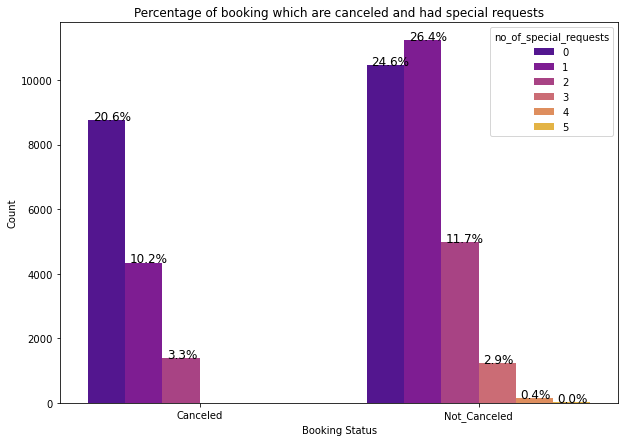

In [94]:
## Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
plt.figure(figsize=(10,7))
ax = sns.countplot(data['booking_status'],palette='plasma', hue=data['no_of_special_requests'])
plt.title('Percentage of booking which are canceled and had special requests')
plt.xlabel('Booking Status')
plt.ylabel('Count')
bar_perc(ax,data['booking_status'])

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14487         28089  42576
0                           8752         10476  19228
1                           4346         11225  15571
2                           1389          4992   6381
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


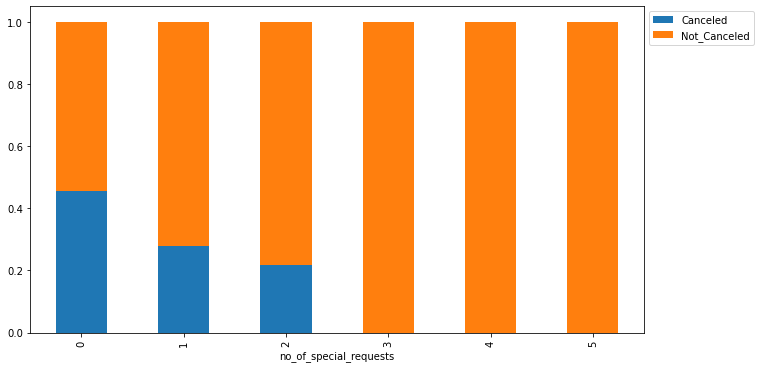

In [95]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* Majority of guests, 20.6%,  who cancelled bookings do not have a special request.
* Only 10.2% of guests,  who cancelled bookings have a special request number 1.
* Majority of guests, 26.4%,  who did not cancelled bookings have a special request number 1.
* 24.6%, guests who did not cancel booking have no special request.

In [96]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   14487         28089  42576
Meal Plan 1           10511         21352  31863
Not Selected           3118          5598   8716
Meal Plan 2             857          1132   1989
Meal Plan 3               1             7      8
------------------------------------------------------------------------------------------------------------------------


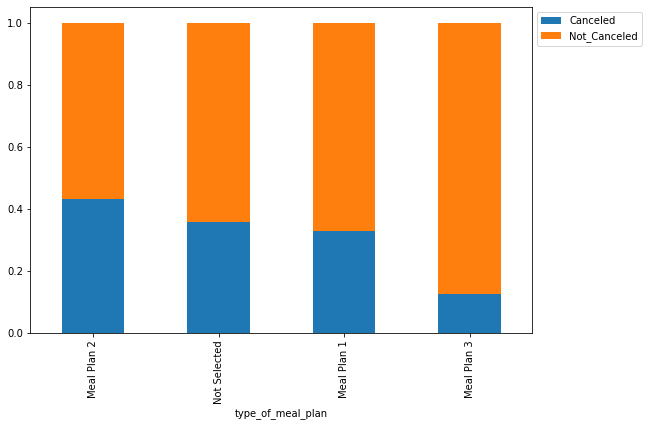

In [97]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

- Less cancellations on meal plan 3, meal plan 2 has most cancellations.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    14487         28089  42576
Room_Type 1             9225         20505  29730
Room_Type 4             3683          5686   9369
Room_Type 6              826           714   1540
Room_Type 5              367           539    906
Room_Type 2              274           444    718
Room_Type 7              110           197    307
Room_Type 3                2             4      6
------------------------------------------------------------------------------------------------------------------------


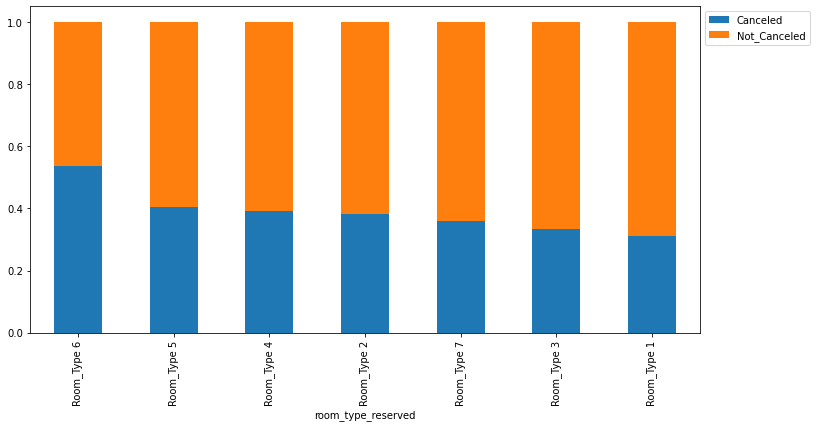

In [98]:
stacked_barplot(data, "room_type_reserved", "booking_status")

- Room type 1, 3 , 7 have less cancellations as compared to others.

### Let us check which of these differences are statistically significant.
The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.<br>

Null Hypothesis - There is no association between the two variables.<br>
Alternate Hypothesis - There is an association between two variables.

In [99]:
import scipy.stats as stats
crosstab = pd.crosstab(
    data["no_of_special_requests"], data["repeated_guest"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "no_of_special_requests score has no effect on repeated_guest"  # Stating the Null Hypothesis
Ha = "no_of_special_requests score has an effect on repeated_guest"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

no_of_special_requests score has an effect on repeated_guest as the p_value (0.0) < 0.05


In [100]:
import scipy.stats as stats
crosstab = pd.crosstab(
    data["market_segment_type"], data["repeated_guest"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "no_of_special_requests score has no effect on repeated_guest"  # Stating the Null Hypothesis
Ha = "no_of_special_requests score has an effect on repeated_guest"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

no_of_special_requests score has an effect on repeated_guest as the p_value (0.0) < 0.05


In [101]:
import scipy.stats as stats
crosstab = pd.crosstab(
    data["no_of_special_requests"], data["market_segment_type"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "no_of_special_requests score has no effect on repeated_guest"  # Stating the Null Hypothesis
Ha = "no_of_special_requests score has an effect on repeated_guest"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

no_of_special_requests score has an effect on repeated_guest as the p_value (0.0) < 0.05


- P-value for all tests < 0.01. Hence, all the differences that we see in the 3 plots are statistically significant.
- There is a correlation between no_of_special_requests and market_segment_type.
- There is a correlation between repeated_guest and market_segment_type. 
- There is a correlation between repeated_guest and market_segment_type. 

In [102]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    
#fig1, axes1 =plt.subplots(1,4,figsize=(14,5))
#


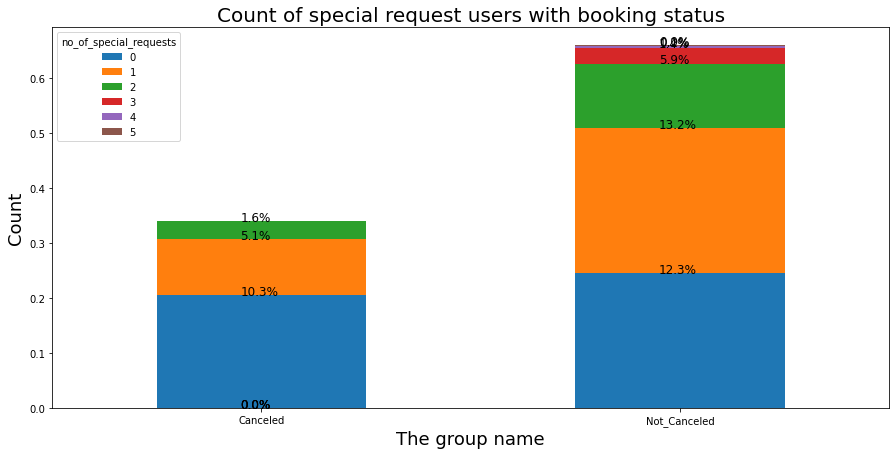

In [103]:
# count-percentage bar plot of converted users of all groups
## I will use the crosstab to explore two categorical values
# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=data['booking_status'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=data[data['no_of_special_requests'].isin(data['no_of_special_requests']\
                                                                            .value_counts().index.values)]['no_of_special_requests'])
# Ploting the crosstab that we did above
axis1=crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(15,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Count of special request users with booking status", fontsize=20) # seting the title size
plt.xlabel("The group name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
bar_perc(axis1,crosstab_eda)
plt.show() # rendering

In [496]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

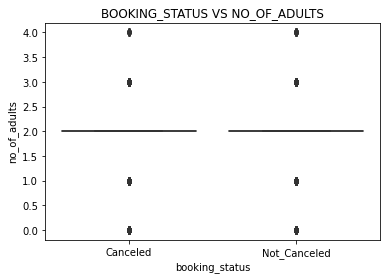

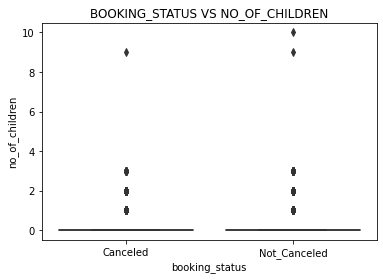

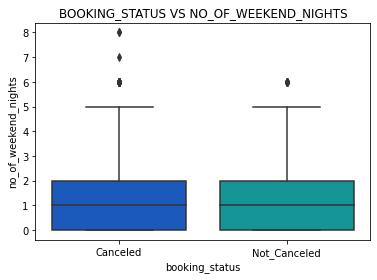

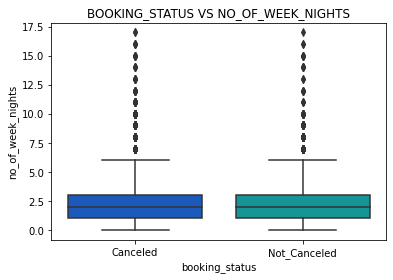

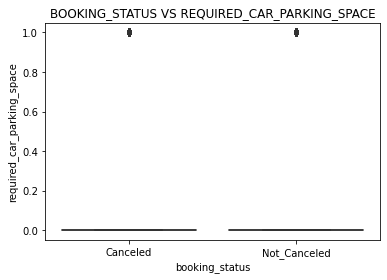

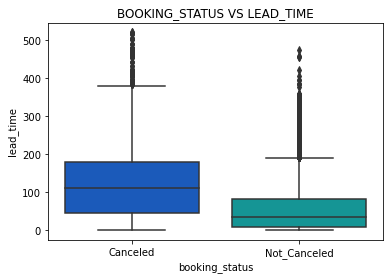

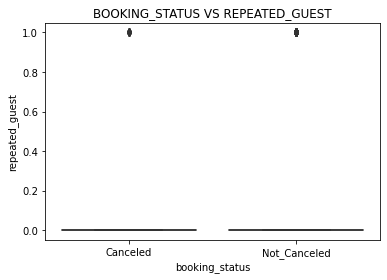

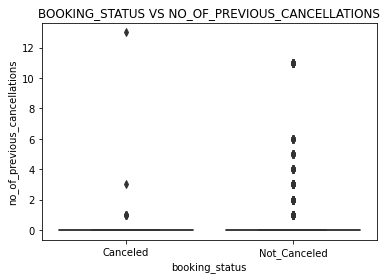

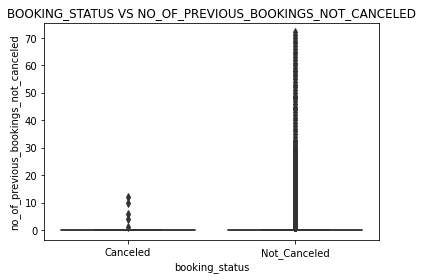

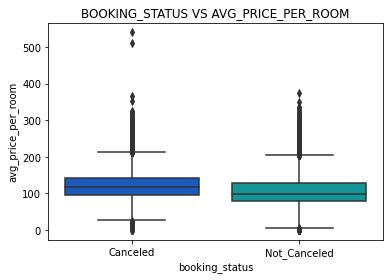

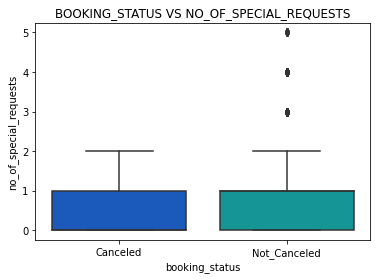

In [497]:
# display box plots of all variables VS time_spent_on_the_page
num_col=['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
for i in range(len(num_col)):
    order = data[num_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.boxplot('booking_status',num_col[i], data=data,palette= 'winter').set(title=("booking_status VS "+num_col[i]).upper())
    plt.show()

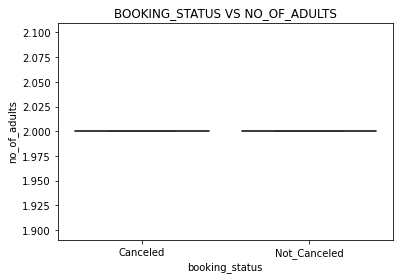

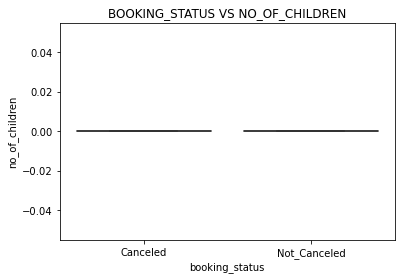

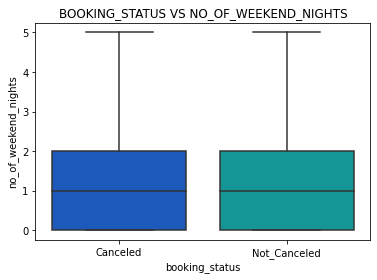

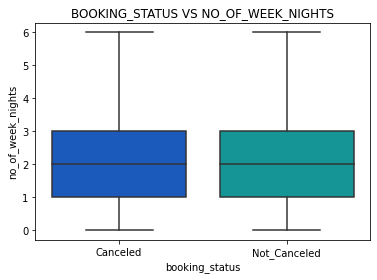

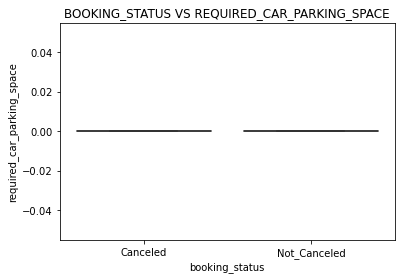

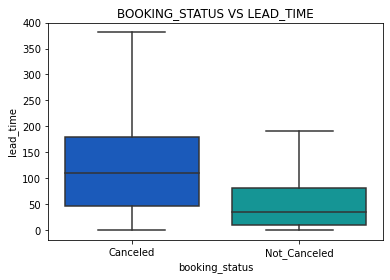

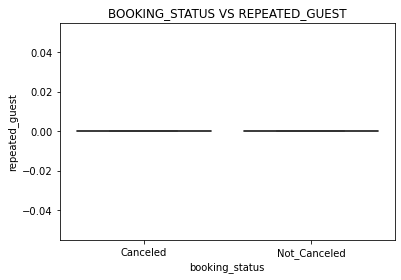

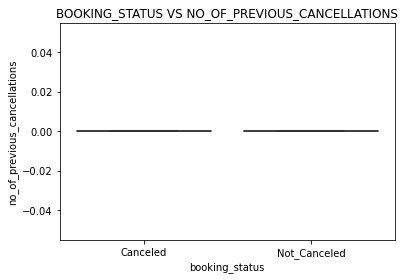

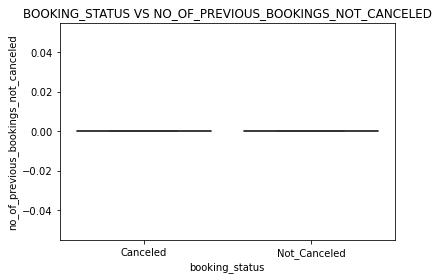

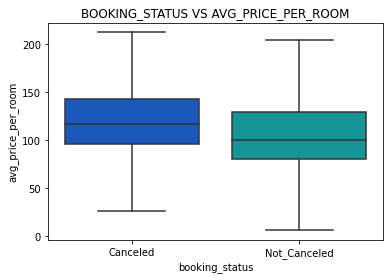

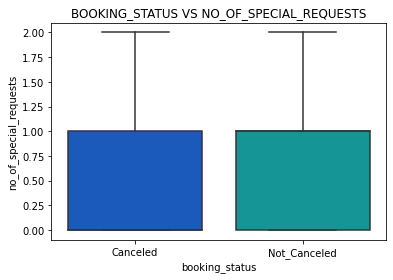

In [106]:
# display box plots of all variables VS time_spent_on_the_page
num_col=['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
for i in range(len(num_col)):
    order = data[num_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.boxplot('booking_status',num_col[i], data=data,palette= 'winter',  showfliers=False).set(title=("booking_status VS "+num_col[i]).upper())
    plt.show()

### Observations: 
If outliers are removed, 
* number of adults who cancelled and who did not cancel have a similar boxplot, so does not have much association.
* number of familys with more children is a little bit higher no cancellation than those who cancelled, but almost have a similar plot.
* car parking, number of special request and repeated guests with no cancellation and those who cancelled, also have similar plots.
* 50% of cancelled bookings have Lead-time between 50 - ~180 days.50% of not cancelled bookings are within 100 days lead-time. So there seems some association between lead-time and booking status.
* average room price between 100-150 Euros  has a little bit higher cancellation rate than those rooms with 90 - 110 Euros  price range. Shows a little association

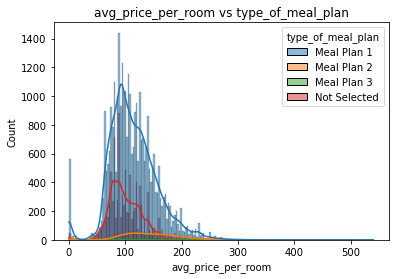

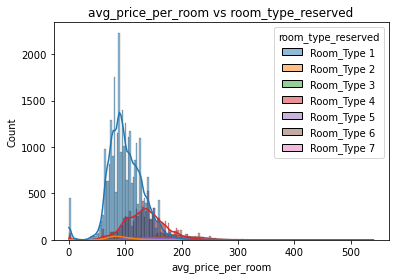

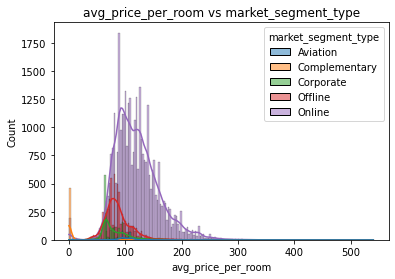

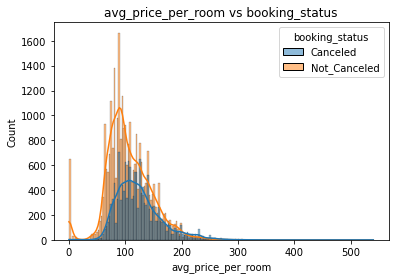

In [107]:
# Display hist plots of all variables VS time_spent_on_the_page
#list_col=['group','converted','landing_page','language_preferred']
for i in range(len(cat_columns)):
    order = data[cat_columns[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.histplot(data=data, x="avg_price_per_room", hue=cat_columns[i], kde = True)
    plt.title("avg_price_per_room vs "+ str(cat_columns[i]));
    plt.show()

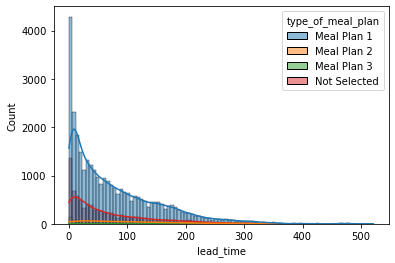

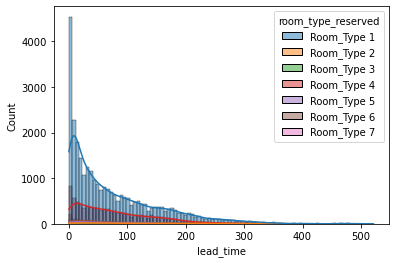

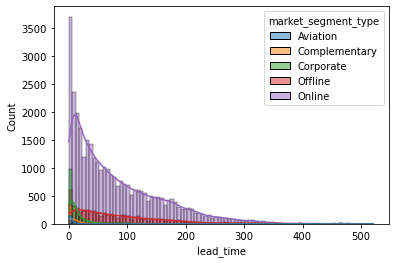

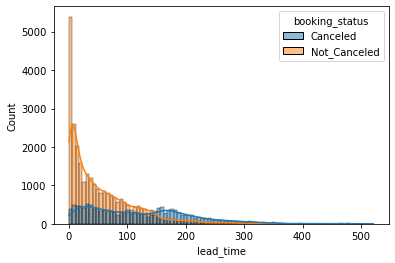

In [108]:
# Display hist plots of all variables VS time_spent_on_the_page
#list_col=['group','converted','landing_page','language_preferred']
for i in range(len(cat_columns)):
    order = data[cat_columns[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.histplot(data=data, x="lead_time", hue=cat_columns[i], kde = True)
  #  plt.title("lead_time vs "+ str(cat_columns[i]));
    plt.show()

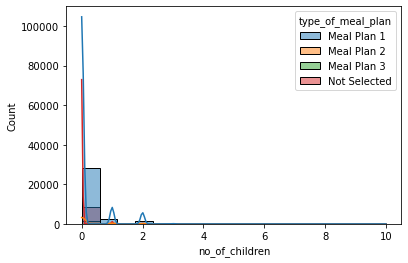

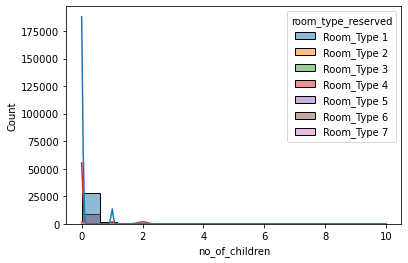

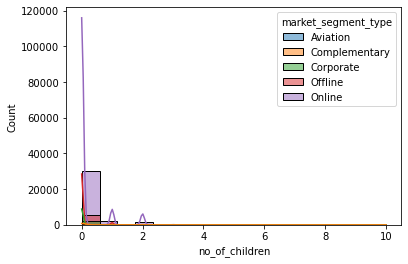

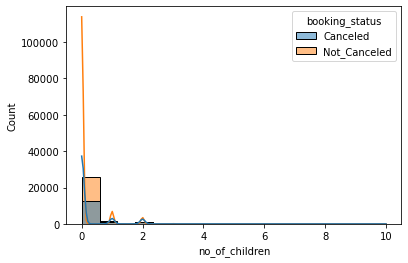

In [109]:
for i in range(len(cat_columns)):
    order = data[cat_columns[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.histplot(data=data, x="no_of_children", hue=cat_columns[i], kde = True)
   # plt.title("no_of_children vs "+ str(cat_columns[i]));
    plt.show()

### Identify Correlation in data

In [110]:
# It will show correlation matrix
data.corr()

no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.046768   
no_of_children                           -0.046768        1.000000   
no_of_weekend_nights                      0.088448        0.015463   
no_of_week_nights                         0.114718        0.022396   
required_car_parking_space               -0.013978        0.015151   
lead_time                                 0.157586        0.036515   
arrival_year                              0.089816        0.012982   
arrival_month                             0.001775        0.013723   
arrival_date                              0.007152        0.016474   
repeated_guest                           -0.248220       -0.048387   
no_of_previous_cancellations             -0.082402       -0.021786   
no_of_previous_bookings_not_canceled     -0.151376       -0.029038   
avg_price_per_room                        0.352854        0.344863   
no_of_special_requests                    0.113269        0.063826   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.088448           0.114718   
no_of_children                                    0.015463           0.022396   
no_of_weekend_nights                              1.000000           0.234575   
no_of_week_nights                                 0.234575           1.000000   
required_car_parking_space                       -0.054138          -0.061178   
lead_time                                         0.116011           0.209997   
arrival_year                                      0.025955           0.049051   
arrival_month                                     0.000370          -0.000454   
arrival_date                                      0.000177          -0.014510   
repeated_guest                                   -0.096068          -0.121374   
no_of_previous_cancellations                     -0.036461          -0.039081   
no_of_previous_bookings_not_canceled             -0.048818          -0.058228   
avg_price_per_room                                0.002365           0.024760   
no_of_special_requests                            0.006193           0.026863   

                                      required_car_parking_space  lead_time  \
no_of_adults                                           -0.013978   0.157586   
no_of_children                                          0.015151   0.036515   
no_of_weekend_nights                                   -0.054138   0.116011   
no_of_week_nights                                      -0.061178   0.209997   
required_car_parking_space                              1.000000  -0.046068   
lead_time                                              -0.046068   1.000000   
arrival_year                                           -0.046091   0.210627   
arrival_month                                           0.009392   0.105792   
arrival_date                                            0.000628   0.036721   
repeated_guest                                          0.122087  -0.154935   
no_of_previous_cancellations                            0.035573  -0.060561   
no_of_previous_bookings_not_canceled                    0.073901  -0.088774   
avg_price_per_room                                      0.026600   0.007367   
no_of_special_requests                                  0.065491   0.024544   

                                      arrival_year  arrival_month  \
no_of_adults                              0.089816       0.001775   
no_of_children                            0.012982       0.013723   
no_of_weekend_nights                      0.025955       0.000370   
no_of_week_nights                         0.049051      -0.000454   
required_car_parking_space               -0.046091       0.009392   
lead_time                                 0.210627       0.105792   
arrival_year                              1.000000      -0.471120   
arrival_month                    

### observations:
* repeated guests have 0.4 correlation with no_of_previous_cancellations and 0.6 correlation with no_of_previous_bookings_not_canceled
* avg_price_per_room has 0.4 correlation with no_of_adults and no_of_children
* no_of_previous_bookings_not_canceled has 0.6 correlation with no_of_previous_cancellations
* arrival_month has -0.5 negative correlation with arrival year

In [111]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

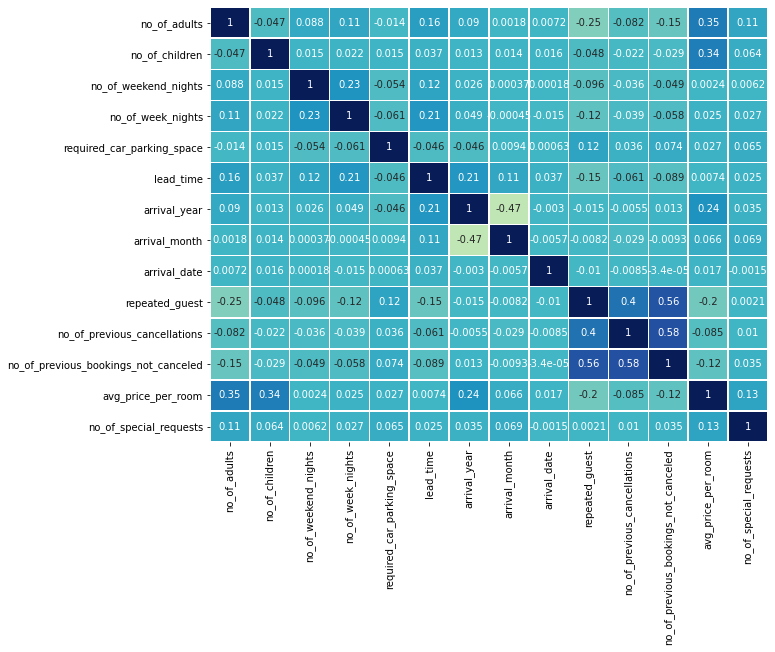

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

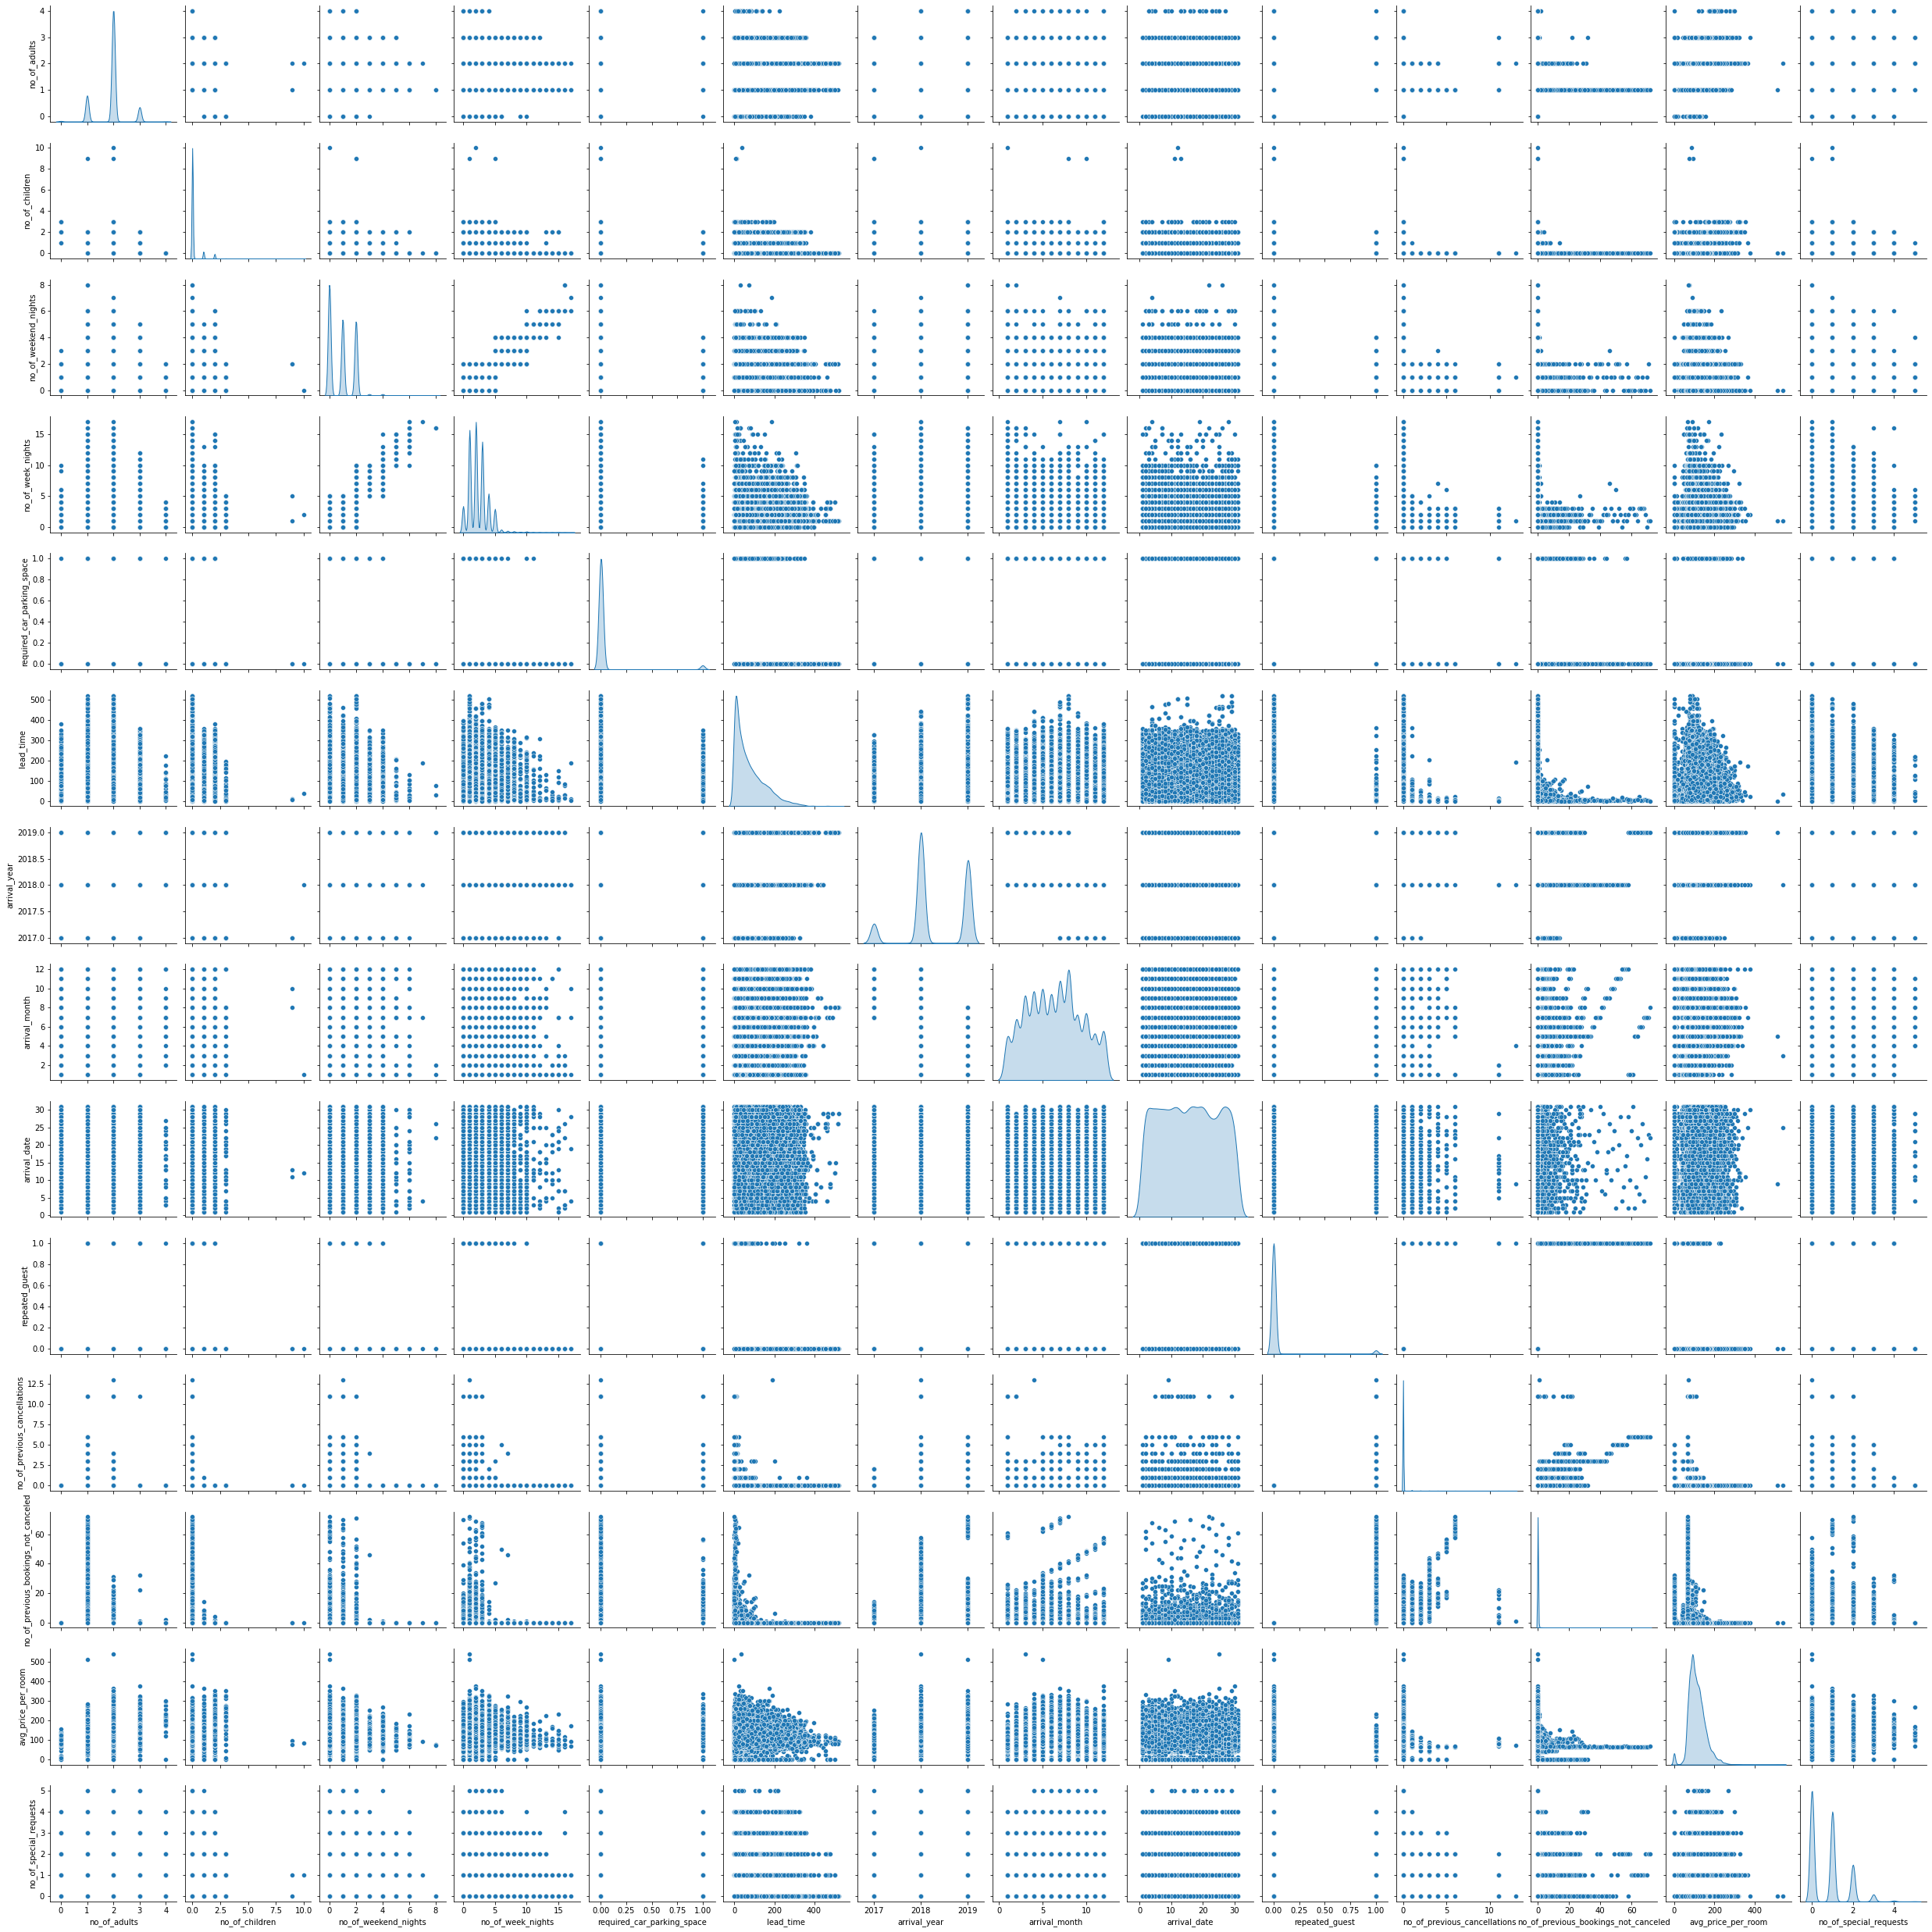

In [113]:
sns.pairplot(data,diag_kind='kde')

In [114]:
n_true = len(data.loc[data['booking_status'] == "Canceled"])
n_false = len(data.loc[data['booking_status'] == "Not_Canceled"])
#print("Number of true cases: {0} ".format(n_true))
#print("Number of false cases: {0} ".format(n_false, ))
#data['booking_status']
print("Number of booking status cancelled: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of booking status cancelled: 14487 (34.03%)
Number of false cases: 28089 (65.97%)


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [126]:
#data=df_copy.copy()

In [183]:
data.sample(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
9831              2               0                     1                  2   
53501             1               0                     1                  2   
32444             0               2                     1                  1   
38030             2               0                     0                  4   
25051             2               0                     1                  2   
28176             3               0                     0                  3   
32714             1               0                     0                  1   
1940              2               1                     2                  2   
29984             2               0                     0                  2   
34063             2               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
9831        Meal Plan 1                           0        Room_Type 4   
53501       Meal Plan 1                           0        Room_Type 1   
32444       Meal Plan 1                           0        Room_Type 2   
38030       Meal Plan 1                           0        Room_Type 1   
25051      Not Selected                           0        Room_Type 1   
28176       Meal Plan 1                           0        Room_Type 4   
32714       Meal Plan 1                           0        Room_Type 1   
1940        Meal Plan 1                           0        Room_Type 1   
29984       Meal Plan 1                           0        Room_Type 1   
34063      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
9831         208          2018              8            29   
53501         41          2018             10             3   
32444         35          2018              2             6   
38030        188          2019              8             1   
25051         61          2018             11             4   
28176        279          2019              7            13   
32714         18          2018              9            23   
1940          19          2019              2            11   
29984        123          2017              8            12   
34063         57          2018             11            11   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
9831              Offline               0                             0   
53501              Online               0                             0   
32444              Online               0                             0   
38030             Offline               0                             0   
25051              Online               0                             0   
28176              Online               0                             0   
32714              Online               0                             0   
1940               Online               0                             0   
29984              Online               0                             0   
34063              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
9831                                      0               90.95   
53501                                     0              105.30   
32444                                     0               69.50   
38030                                     0               85.00   
25051                                     0               79.20   
28176                                     0              139.50   
32714                                     0              159.00   
1940                                      0              108.80   
29984                                     0               76.50   
34063                                     0               79.20   

       no_of_special_requests booking_status  
9831  

### Observations:
- type_of_meal_plan has to converted to numbers by one hot encoding.
- room_type_reserved has to converted to numbers by one hot encoding.
- market_segment_type has to converted to numbers by one hot encoding.
- booking_status has to be converted to canceled: 1 and not_canceled: 0

# Exploratory Data Analysis Summary:

### DataSet overview Observations
* There are 56926 records and 18 columns.
* Four columns are object. Target variable: 
* Target variable booking_status is also object but will need to be converted to boolean.
* avg_price_per_room is the only float64 variable
* other variables have int64 data type.
* Arrival date, month and year can be combined to get single date and to reduce dimensiality.

* There are no missing values
* There are 14350 duplicate records
* After dropping the duplicates, the dataset has 42576 rows and 18 columns now

#### Discriptive Data Summary:
- no_of_adults: minimum 0 persons , maximum: 4 persons, 75% : 2 persons, discrete variable.
- no_of_children: minimum 0 persons , maximum: 10 persons, 75% : 0 persons, discrete variable.
- no_of_weekend_nights: minimum 0 nights , maximum: 8 nights, 75% : 2 persons, discrete variable.
- no_of_week_nights: minimum 0 nights , maximum: 17 nights, 75% : 3 persons, discrete variable.
- required_car_parking_space: minimum 0  , maximum: 1 , boolean variable.
- lead_time: minimum 0 days , maximum: 521 days, 75% : below 118 days, 50%: between:16 and 118 days, discrete variable.
- repeated_guest: minimum 0  , maximum: 1 , boolean variable.
- no_of_previous_cancellations: minimum 0 days , maximum: 521 days, 75% : below 118 days, 50%: between:16 and 118 days, discrete variable.
- no_of_previous_bookings_not_canceled: minimum 0 days , maximum: 521 days, 75% : below 118 days, 50%: between:16 and 118 days, discrete variable.
- avg_price_per_room: minimum 0 Euros , maximum: 540 Euros, 75% : below 135 Euros, 50%: between:85 and 135 Euros, currency variable.
- no_of_special_requests: minimum 0 , maximum: 5 , 75% : below 1 , discrete variable.
- arrival_year: data from year 2017 to 2019, 50% data is between 2018 and 2019 nominal data
- arrival_month: months from 1 to 12
- arrival_date: dates from 1 to 31

#### Observations on Categorical variables:
- booking_status: 2 unique values, most frequent is Not_Canceled.
- type_of_meal_plan: 4 unique values, most frequent is Meal Plan 1.
- room_type_reserved: 7 unique values, most frequent is Room_Type 1.
- market_segment_type: 5 unique values, most frequent is Online.


#### Observations on Categorical Variables
* booking status has 34% Cancelled and 66% Not_Cancelled
* Majority data: 74.8% has Meal_Plan 1, 20.5% has Not_Selected and 0% is Meal plan 3.
* Majority data : 69.8% is Room type1, Room type4 has 22% and Room type3 has 0%
* Majority market segment: 80.3% is online,13.6% is offline and 0.5% is Aviation

**Questions**:
1. What are the busiest months in the hotel?
    - August is the busiest month with 5312 entries
    - July is 2nd busiest with 4725 entries
    - January is the least busiest month.
2. Which market segment do most of the guests come from?
    - Most of the guest , 80.3% come from online market segment
    - As online market segment is outclassing others, cancellations are also mostly from online market.
    - Complimentary has no cancellation.
3. What are the differences in room prices in different market segments?
    - Online market has the highest average room price: ~120. It may be because majority data is from online market.
    - Aviation has ~103
    - Complementary      2.8
    - Corporate         82.5
    - Offline           87.7

4. What percentage of bookings are canceled? 
    - 34% bookings are concelled
    - 66% bookings are not cancelled.
5. What percentage of repeating guests cancel?
    - 0.% of repeating guests or only 10 in whole dataset cancelled the booking.
    - 34% of non repeating guests cancelled the booking
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
     - 20.6% guests who cancelled booking did not have any special request. 
     - 10.2% guests who cancelled booking have one special request,
     - 24.6% guest who did not cancel the booking, didn't have any special request.
     - 26.4% of guests who had 1 special request did not cancel the booking.
#### Univariate Analysis
lead_time has right skewed distribution.
avg_price_per_room has right skewed distribution.
no_of_special_requests has right skewed distribution.
no_of_week_nights has right skewed distribution
no_of_previous_cancellations:has right skewed distribution
no_of_previous_bookings_not_canceled: has right skewed distribution
It indicates presence of outliers.


### Observations: 
If outliers are removed, 
* number of adults who cancelled and who did not cancel have a similar boxplot, so does not have much association.
* number of familys with more children is a little bit higher no cancellation than those who cancelled, but almost have a similar plot.
* car parking, number of special request and repeated guests with no cancellation and those who cancelled, also have similar plots.
* 50% of cancelled bookings have Lead-time between 50 - ~180 days.50% of not cancelled bookings are within 100 days lead-time. So there seems some association between lead-time and booking status.
* average room price between 100-150 Euros  has a little bit higher cancellation rate than those rooms with 90 - 110 Euros  price range. Shows a little association

# Feature Engineering:
### Combining date, month year after removing rows where month is February and date is greater than 28

In [184]:
# rows where month is February and days are greater than 28:
#data=df.copy()
feb_d=data[(data['arrival_date']>28) & (data['arrival_month']==2)].index
feb_d.value_counts().sum()

35

In [185]:
data.loc[feb_d]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
4108              2               0                     1                  5   
5769              1               0                     1                  3   
8778              2               0                     1                  3   
9928              1               0                     1                  1   
11990             2               1                     1                  5   
12525             2               2                     1                  3   
14071             1               0                     1                  2   
14345             2               2                     1                  3   
14490             2               0                     1                  3   
15144             1               0                     1                  0   
15578             1               0                     1                  2   
16630             2               0                     1                  3   
16725             2               0                     1                  2   
16859             2               0                     1                  3   
18642             1               0                     3                  7   
21961             1               0                     1                  1   
22502             2               0                     1                  3   
24178             1               0                     1                  2   
24297             1               0                     1                  2   
27046             2               0                     1                  3   
29149             1               0                     1                  2   
29374             1               0                     1                  4   
29889             1               0                     1                  1   
32057             2               0                     1                  1   
34023             1               0                     1                  1   
34040             2               0                     1                  2   
40946             2               0                     1                  2   
43226             1               0                     1                  0   
43810             2               0                     1                  5   
47943             2               1                     1                  3   
48051             1               0                     1                  0   
48069             3               0                     1                  2   
50279             2               0                     1                  0   
54359             1               0                     1                  2   
55677             1               0                     1                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
4108        Meal Plan 1                           0        Room_Type 1   
5769        Meal Plan 1                           0        Room_Type 1   
8778        Meal Plan 1                           0        Room_Type 1   
9928        Meal Plan 1                           0        Room_Type 1   
11990       Meal Plan 1                           0        Room_Type 1   
12525       Meal Plan 1                           0        Room_Type 6   
14071       Meal Plan 1                           0        Room_Type 1   
14345       Meal Plan 1                           0        Room_Type 6   
14490       Meal Plan 1                           0        Room_Type 4   
15144       Meal Plan 1                           0        Room_Type 4   
15578       Meal Plan 1                           0        Room_Type 1   
16630       Meal Plan 1                           1        Room_Type 4   
16725       Meal Plan 1                           0        Room_Type 1   
16859       Meal Plan 1                           0        Room_Type 1   
18642       Meal

* There are some dates entered wrongly, as 29 feb is present in this data as this data is from 2017 - 2019 and none of these years was a leap year.

In [186]:
data.loc[feb_d,['arrival_date','arrival_month','arrival_year']]

arrival_date  arrival_month  arrival_year
4108             29              2          2018
5769             29              2          2018
8778             29              2          2018
9928             29              2          2018
11990            29              2          2018
12525            29              2          2018
14071            29              2          2018
14345            29              2          2018
14490            29              2          2018
15144            29              2          2018
15578            29              2          2018
16630            29              2          2018
16725            29              2          2018
16859            29              2          2018
18642            29              2          2018
21961            29              2          2018
22502            29              2          2018
24178            29              2          2018
24297            29              2          2018
27046            29              2          2018
29149            29              2          2018
29374            29              2          2018
29889            29              2          2018
32057            29              2          2018
34023            29              2          2018
34040            29              2          2018
40946            29              2          2018
43226            29              2          2018
43810            29              2          2018
47943            29              2          2018
48051            29              2          2018
48069            29              2          2018
50279            29              2          2018
54359            29              2          2018
55677            29              2          2018

### Dropping the rows with arrival_date= 29 as there were only 28 days in February 2018

In [187]:
data.drop(feb_d, inplace=True)

In [188]:
data.shape

(42541, 18)

### Combining arrival_date, arrival_month and arrival_year to single column

In [189]:
# joining the date, month and year to make a column
df=data.copy()
#df ['arrival_date_1'] = pd.to_datetime(df ['arrival_date'],format='%d-%m-%Y', errors='coerce').dt.date
#data['arrival_date_full']=pd.to_datetime(data[['arrival_year','arrival_month','arrival_date']].astype(str).agg('-'.join, axis=1))
data['arrival_date_full']=data[['arrival_year','arrival_month','arrival_date']].astype(str).agg('-'.join, axis=1)
data['arrival_date_full']=pd.to_datetime(data['arrival_date_full'])
data['arrival_date_full']
#df ['arrival_date_1']

0       2017-10-02
1       2018-11-06
2       2018-02-28
3       2018-05-20
4       2019-07-13
           ...    
56920   2018-07-01
56921   2019-06-15
56922   2019-05-15
56923   2018-04-21
56924   2019-04-28
Name: arrival_date_full, Length: 42541, dtype: datetime64[ns]

In [190]:
#then we create the function to implement it to all values from the column of interest.
def date_to_week(data_value):
    return data_value.weekday()
data['Day of the Week'] = data['arrival_date_full'].apply(date_to_week)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status arrival_date_full  Day of the Week  
0                       0   Not_Canceled        2017-10-02                0  
1                       1   Not_Canceled        2018-11-06                1  
2                       0       Canceled        2018-02-28                2  
3                       0       Canceled        2018-05-20                6  
4                       2       Canceled        2019-07-13                5

In [191]:
# Exctracting Week days from dates
weekday={0:"Monday",
        1:"Tuesday",
        2:"Wednesday",
        3:"Thursday",
        4:"Friday",
        5: "Saturday",
        6:"Sunday"}
data["Week"]=data['Day of the Week'].replace(weekday)
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4            277          2019              7            13   
...          ...           ...            ...           ...   
56920        148          2018              7             1   
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
56920              Online               0                             0   
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                         

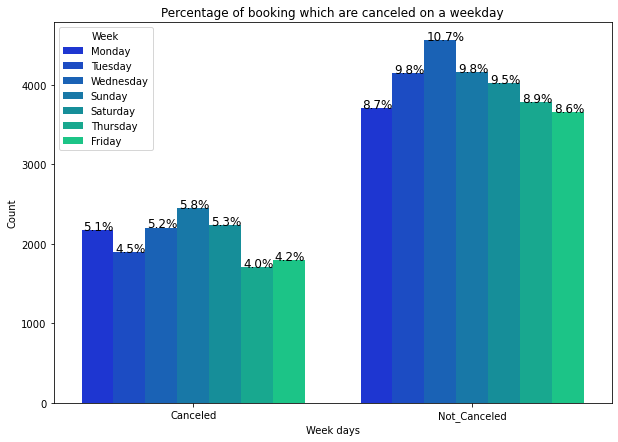

In [192]:
## Q7. Does the week day affect booking cancellation?
plt.figure(figsize=(10,7))
ax = sns.countplot(data['booking_status'],palette='winter', hue=data['Week'])
plt.title('Percentage of booking which are canceled on a weekday')
plt.xlabel('Week days')
plt.ylabel('Count')
bar_perc(ax,data['booking_status'])

* Highest cancellation rate is for Sunday: 5.8%. Lowest cancellation was on Thursday 4%
* Highest non cancellation rate is for Wednesday: 10.7%.Lowest non cancellation was on Friday 8.6%

In [193]:
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4            277          2019              7            13   
...          ...           ...            ...           ...   
56920        148          2018              7             1   
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
56920              Online               0                             0   
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                         

In [194]:
data.drop(['Week'], axis=1, inplace=True)

In [195]:
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4            277          2019              7            13   
...          ...           ...            ...           ...   
56920        148          2018              7             1   
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
56920              Online               0                             0   
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                         

In [196]:
df=data.copy()
#data=df.copy()

# Treating outliers

In [197]:
# Treating Outliers of the rest of the numeric variables

In [198]:
# function to treat outliers by converting 
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    #Lower_Whisker = Q1 - 1.5 * IQR
    #Upper_Whisker = Q3 + 1.5 * IQR
    Lower_Whisker = Q1 - 3 * IQR
    Upper_Whisker = Q3 + 3 * IQR
    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


#def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """

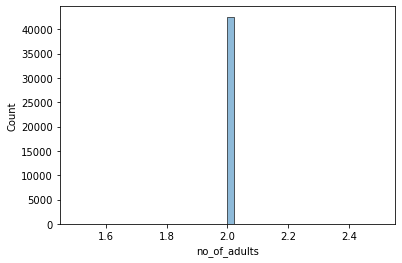

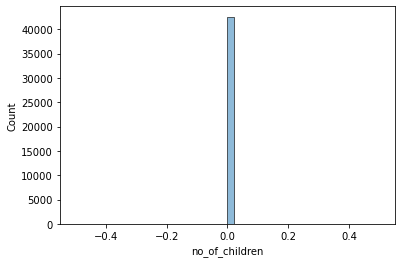

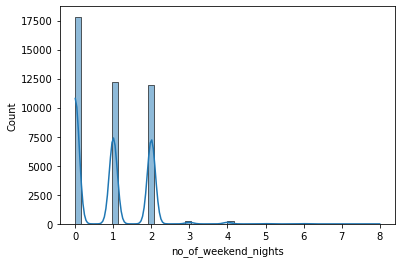

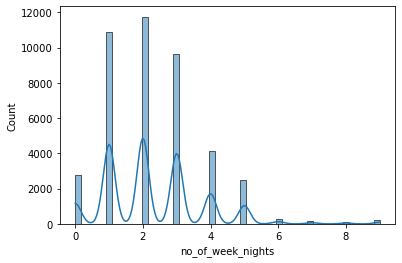

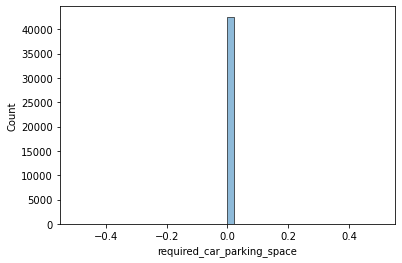

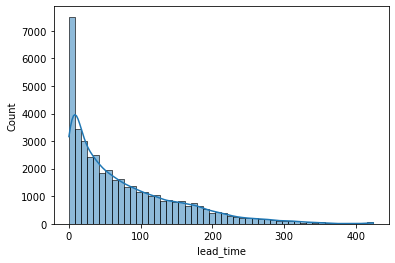

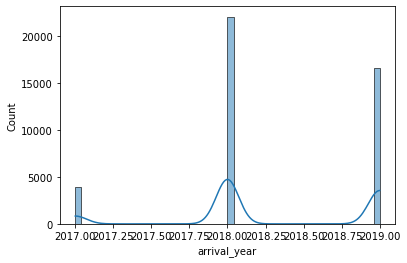

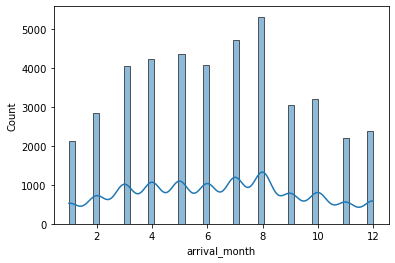

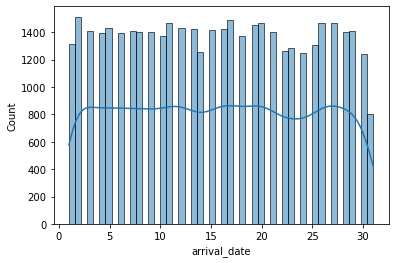

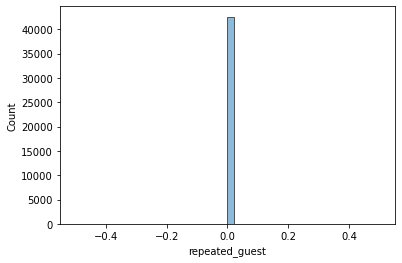

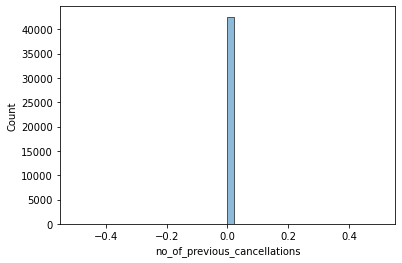

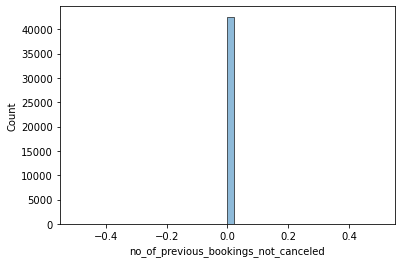

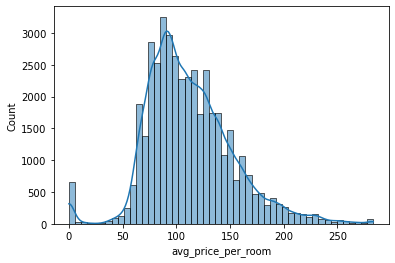

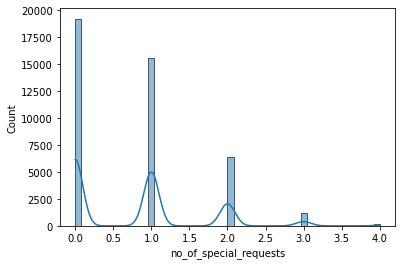

In [199]:
# distributions after treating outliers
cols_to_ol = ['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']# 'ram',],'release_year',,'days_used','int_memory''main_camera_mp','selfie_camera_mp',
for colname in cols_to_ol:
    data = treat_outliers(data, colname) # applying outlier removal function
    sns.histplot(data[colname], bins=50, kde=True)
    plt.show()
    #def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
#    for c in col_list:
#        df = treat_outliers(df, c)

#    return df

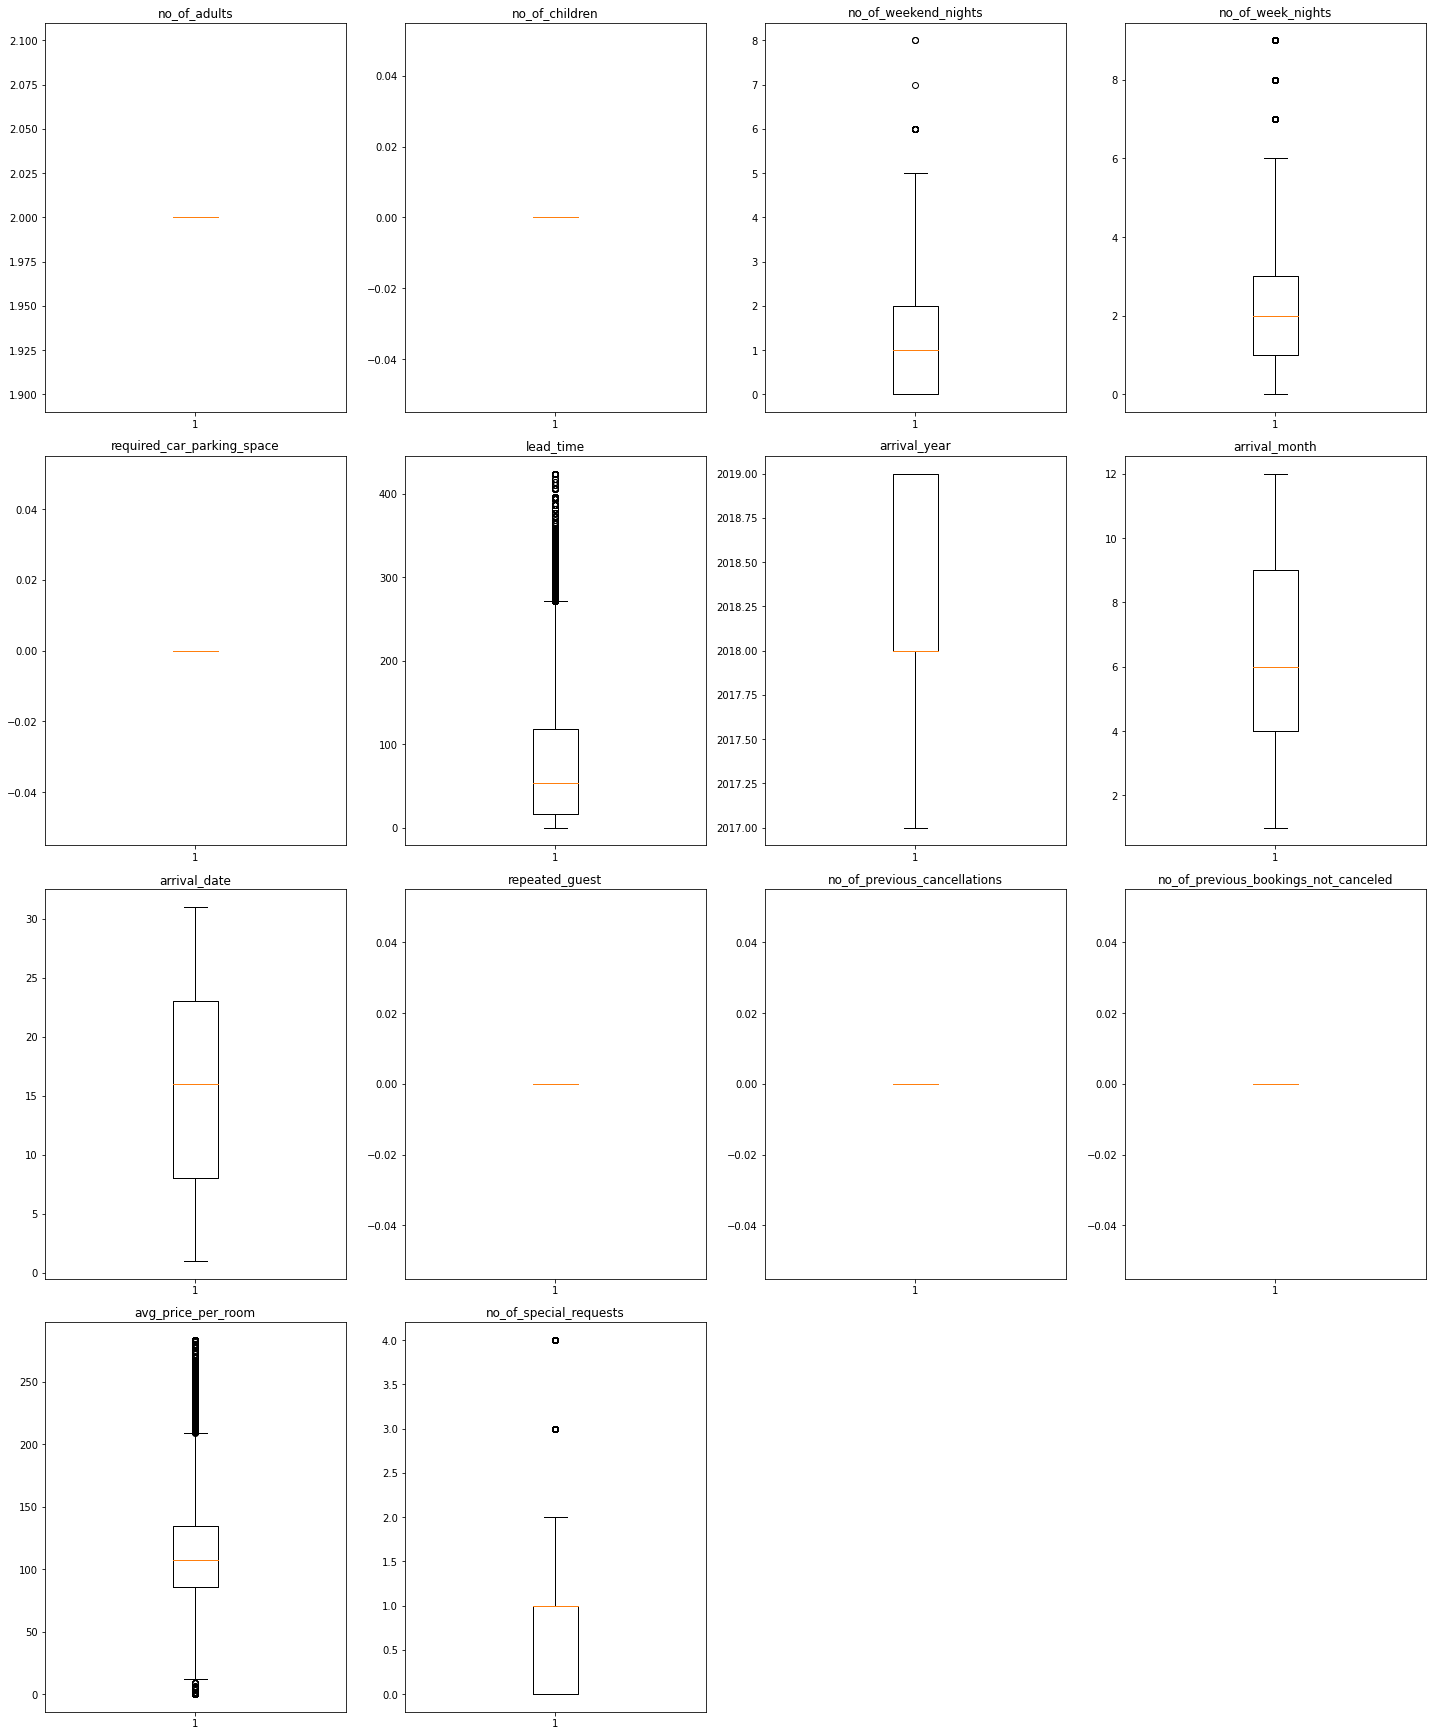

In [200]:
#BOXPLOT after outliers removal
# let's plot the boxplots of all columns to check for outliers
numeric_columns=['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Ecoding booking_status

In [201]:
bk_variable = {'Not_Canceled' : 0 , 'Canceled' : 1 }
data['booking_status'] = data['booking_status'].map(bk_variable)
#data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)

In [202]:
data.booking_status.value_counts()

0    28061
1    14480
Name: booking_status, dtype: int64

In [203]:
data['booking_status'] = data['booking_status'].astype(int)

In [204]:
data.booking_status

0        0
1        0
2        1
3        1
4        1
        ..
56920    0
56921    0
56922    1
56923    1
56924    0
Name: booking_status, Length: 42541, dtype: int32

In [205]:
data.drop(["arrival_year", "arrival_month", "arrival_date"], axis=1,inplace = True)
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 2               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               0                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time market_segment_type  repeated_guest  \
0            224             Offline               0   
1              5              Online               0   
2              1              Online               0   
3            211              Online               0   
4            277              Online               0   
...          ...                 ...             ...   
56920        148              Online               0   
56921         45              Online               0   
56922        320             Offline               0   
56923         63              Online               0   
56924          6              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
56920                             0                                     0   
56921                             0                                     0   
56922                             0                                     0   
56923                             0                                     0   
56924                             0                                     0   

       avg_price_per_room  no_of_special_requests  booking_status  \
0                   65.00                       0               0   
1                  106.68                       1               0   
2                   60.00                       0               1   
3                  100.00                       0               1   
4                   89.10                       2               1   
...                   ...                     ...             ...   
56920               98.39                       2               0   
56921  

In [206]:
data['arrival_date_full'] = pd.to_datetime(data['arrival_date_full'],infer_datetime_format=True)

### Binning dates into yearly Quarters

In [207]:
data['yearly_quarter'] = pd.PeriodIndex(data.arrival_date_full, freq='Q')
data[['yearly_quarter' , 'arrival_date_full']]

yearly_quarter arrival_date_full
0             2017Q4        2017-10-02
1             2018Q4        2018-11-06
2             2018Q1        2018-02-28
3             2018Q2        2018-05-20
4             2019Q3        2019-07-13
...              ...               ...
56920         2018Q3        2018-07-01
56921         2019Q2        2019-06-15
56922         2019Q2        2019-05-15
56923         2018Q2        2018-04-21
56924         2019Q2        2019-04-28

[42541 rows x 2 columns]

In [208]:
# function to convert arrival_date_full to ordinal to be read by Logistic Regression model
# data['arrival_date_full']=data['arrival_date_full'].apply(lambda x: x.toordinal())

In [209]:
data.yearly_quarter.unique()

<PeriodArray>
['2017Q4', '2018Q4', '2018Q1', '2018Q2', '2019Q3', '2019Q2', '2018Q3',
 '2017Q3', '2019Q1']
Length: 9, dtype: period[Q-DEC]

In [210]:
data.yearly_quarter.value_counts()

2019Q2    6918
2018Q3    6624
2018Q2    5730
2018Q4    5671
2019Q1    4966
2019Q3    4692
2018Q1    4047
2017Q4    2115
2017Q3    1778
Freq: Q-DEC, Name: yearly_quarter, dtype: int64

In [211]:
# cell['four_g']=cell.four_g.astype('category')
data['yearly_quarter']=data.yearly_quarter.astype('category')

In [212]:
data.drop(["arrival_date_full"], axis=1,inplace = True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Building a Logistic Regression model

In [213]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [214]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [215]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Data Preparation

In [216]:
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 2               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               0                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time market_segment_type  repeated_guest  \
0            224             Offline               0   
1              5              Online               0   
2              1              Online               0   
3            211              Online               0   
4            277              Online               0   
...          ...                 ...             ...   
56920        148              Online               0   
56921         45              Online               0   
56922        320             Offline               0   
56923         63              Online               0   
56924          6              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
56920                             0                                     0   
56921                             0                                     0   
56922                             0                                     0   
56923                             0                                     0   
56924                             0                                     0   

       avg_price_per_room  no_of_special_requests  booking_status  \
0                   65.00                       0               0   
1                  106.68                       1               0   
2                   60.00                       0               1   
3                  100.00                       0               1   
4                   89.10                       2               1   
...                   ...                     ...             ...   
56920               98.39                       2               0   
56921  

In [217]:
# Splitting the target from predictors
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

In [218]:
X = pd.get_dummies(X, drop_first = True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             2               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     0                  3   

   required_car_parking_space  lead_time  repeated_guest  \
0                           0        224               0   
1                           0          5               0   
2                           0          1               0   
3                           0        211               0   
4                           0        277               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  Day of the Week  \
0               65.00                       0                0   
1              106.68                       1                1   
2               60.00                       0                2   
3              100.00                       0                6   
4               89.10                       2                5   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3       

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [219]:
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                            261.949293
no_of_children                                 NaN
no_of_weekend_nights                      1.370189
no_of_week_nights                         1.204515
required_car_parking_space                     NaN
lead_time                                 1.438880
repeated_guest                                 NaN
no_of_previous_cancellations                   NaN
no_of_previous_bookings_not_canceled           NaN
avg_price_per_room                        2.957889
no_of_special_requests                    1.094292
Day of the Week                           1.322661
type_of_meal_plan_Meal Plan 2             1.110100
type_of_meal_plan_Meal Plan 3             1.020903
type_of_meal_plan_Not Selected            1.334246
room_type_reserved_Room_Type 2            1.036483
room_type_reserved_Room_Type 3            1.001135
room_type_reserved_Room_Type 4            1.355620
room_type_reserved_Room_Type 5            1.121

These variables :'no_of_children','repeated_guest',"required_car_parking_space",'no_of_previous_cancellations','no_of_previous_bookings_not_canceled'
are resulting in NAN when applied vif, so I'll revome these. 

In [220]:
#Removing Multicollinearity
col_remove = ['no_of_children','repeated_guest',"required_car_parking_space",'no_of_previous_cancellations','no_of_previous_bookings_not_canceled'   ]
X = X.drop(col_remove, axis=1,)

vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                         261.949293
no_of_weekend_nights                   1.370189
no_of_week_nights                      1.204515
lead_time                              1.438880
avg_price_per_room                     2.957889
no_of_special_requests                 1.094292
Day of the Week                        1.322661
type_of_meal_plan_Meal Plan 2          1.110100
type_of_meal_plan_Meal Plan 3          1.020903
type_of_meal_plan_Not Selected         1.334246
room_type_reserved_Room_Type 2         1.036483
room_type_reserved_Room_Type 3         1.001135
room_type_reserved_Room_Type 4         1.355620
room_type_reserved_Room_Type 5         1.121002
room_type_reserved_Room_Type 6         1.425983
room_type_reserved_Room_Type 7         1.133611
market_segment_type_Complementary      3.779783
market_segment_type_Corporate         10.555056
market_segment_type_Offline           26.890568
market_segment_type_Online            35.604845
yearl

In [221]:
#Removing Multicollinearity
col_remove = ['no_of_adults','market_segment_type_Offline'   ]
X = X.drop(col_remove, axis=1,)

vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_weekend_nights                  2.602117
no_of_week_nights                     4.125330
lead_time                             2.772641
avg_price_per_room                   19.470281
no_of_special_requests                2.015547
Day of the Week                       4.034076
type_of_meal_plan_Meal Plan 2         1.162349
type_of_meal_plan_Meal Plan 3         1.021021
type_of_meal_plan_Not Selected        1.651096
room_type_reserved_Room_Type 2        1.053939
room_type_reserved_Room_Type 3        1.001261
room_type_reserved_Room_Type 4        1.676364
room_type_reserved_Room_Type 5        1.124591
room_type_reserved_Room_Type 6        1.393373
room_type_reserved_Room_Type 7        1.113554
market_segment_type_Complementary     1.215134
market_segment_type_Corporate         1.303355
market_segment_type_Online            8.512808
yearly_quarter_2017Q4                 1.511645
yearly_quarter_2018Q1                 2.009564
yearly_quarter_2018Q2    

- Multicollinearity has reduced much, so we will keep these features.

In [222]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=1)

In [223]:
print("Number of rows in train data = ", X_train.shape[0])
print("Number of rows in test data = ", X_test.shape[0])

Number of rows in train data =  25524
Number of rows in test data =  17017


In [224]:
print("Percentage of classes in training set: ")
print(y_train.value_counts(normalize= True))
print("Percentage of classes in test set: ")
print(y_test.value_counts(normalize = True))

Percentage of classes in training set: 
0    0.65981
1    0.34019
Name: booking_status, dtype: float64
Percentage of classes in test set: 
0    0.659341
1    0.340659
Name: booking_status, dtype: float64


In [225]:
print("Original Canceled True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['booking_status'] == 1]), (len(data.loc[data['booking_status'] == 1])/len(data.index)) * 100))
print("Original Canceled False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['booking_status'] == 0]), (len(data.loc[data['booking_status'] == 0])/len(data.index)) * 100))
print("")
print("Training Canceled True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Canceled False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Canceled True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Canceled Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Canceled True Values    : 14480 (34.04%)
Original Canceled False Values   : 28061 (65.96%)

Training Canceled True Values    : 8683 (34.02%)
Training Canceled False Values   : 16841 (65.98%)

Test Canceled True Values        : 5797 (34.07%)
Test Canceled Values       : 11220 (65.93%)



In [226]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42541 entries, 0 to 56924
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_weekend_nights               42541 non-null  int64  
 1   no_of_week_nights                  42541 non-null  int64  
 2   lead_time                          42541 non-null  int64  
 3   avg_price_per_room                 42541 non-null  float64
 4   no_of_special_requests             42541 non-null  int64  
 5   Day of the Week                    42541 non-null  int64  
 6   type_of_meal_plan_Meal Plan 2      42541 non-null  uint8  
 7   type_of_meal_plan_Meal Plan 3      42541 non-null  uint8  
 8   type_of_meal_plan_Not Selected     42541 non-null  uint8  
 9   room_type_reserved_Room_Type 2     42541 non-null  uint8  
 10  room_type_reserved_Room_Type 3     42541 non-null  uint8  
 11  room_type_reserved_Room_Type 4     42541 non-null  uin

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Logistic Regression (with Sklearn library)

In [227]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

### checking performance on training set

In [228]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [229]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7920388653816016
Precision: 0.732150226991333
Recall: 0.6129218012207762
F1: 0.6672517552657974


### checking performance on testing set

In [230]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [231]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.7959099723805606
Precision: 0.7387017255546425
Recall: 0.6203208556149733
F1: 0.6743553680262541


# Logistic Regression (with statsmodels library)

## Model evaluation criterion
Model can make wrong predictions as:
- Predicting a customer will not cancel the booking but in reality the customer would cancel.

- Predicting a customer will cancel booking but in reality the customer would not cancel.

Which case is more important?
- If we predict a non-cancelling customer as a cancelling customer hotel would lose oppertunity. 
How to reduce this loss i.e need to reduce False Positives?
- If we predict a cancelling customer as a non-cancelling customer hotel would lose revenue. 
How to reduce this loss i.e need to reduce False Negatives?
recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [354]:
# Splitting the target from predictors
X1 = data.drop(["booking_status"], axis=1)
Y1 = data["booking_status"].astype("int64")

In [355]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42541 entries, 0 to 56924
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42541 non-null  int64   
 1   no_of_children                        42541 non-null  int64   
 2   no_of_weekend_nights                  42541 non-null  int64   
 3   no_of_week_nights                     42541 non-null  int64   
 4   type_of_meal_plan                     42541 non-null  category
 5   required_car_parking_space            42541 non-null  int64   
 6   room_type_reserved                    42541 non-null  category
 7   lead_time                             42541 non-null  int64   
 8   market_segment_type                   42541 non-null  category
 9   repeated_guest                        42541 non-null  int64   
 10  no_of_previous_cancellations          42541 non-null  int64   
 11  no

In [356]:
X1 = X1.drop(['no_of_adults','no_of_children','repeated_guest',"required_car_parking_space",'no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1)

In [357]:
X1 = pd.get_dummies(X1, drop_first = True)
X1.head()

no_of_weekend_nights  no_of_week_nights  lead_time  avg_price_per_room  \
0                     1                  2        224               65.00   
1                     2                  3          5              106.68   
2                     2                  1          1               60.00   
3                     0                  2        211              100.00   
4                     0                  3        277               89.10   

   no_of_special_requests  Day of the Week  type_of_meal_plan_Meal Plan 2  \
0                       0                0                              0   
1                       1                1                              0   
2                       0                2                              0   
3                       0                6                              0   
4                       2                5                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   market_segment_type_Offline  market_segment_type_Online  \
0                            1                           0   
1                            0                           1   
2                            0                           1   
3                            0                           1   
4                            0                           1   

   yearly_quarter_2017Q4  yearly_quarter_2018Q1  yearly_quarter_2018Q2  \
0                      1                      0                      0   
1                      0                      0                      0   
2                      0                      1                      0   
3                      0                      0                      1   
4                      0                      0                      0   

   yearly_quarter_2018Q3  yearly_quarter_2018Q4  yearly_quarter_2019Q1  \
0                      0                      0                      0   
1                      0      

In [358]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42541 entries, 0 to 56924
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_weekend_nights               42541 non-null  int64  
 1   no_of_week_nights                  42541 non-null  int64  
 2   lead_time                          42541 non-null  int64  
 3   avg_price_per_room                 42541 non-null  float64
 4   no_of_special_requests             42541 non-null  int64  
 5   Day of the Week                    42541 non-null  int64  
 6   type_of_meal_plan_Meal Plan 2      42541 non-null  uint8  
 7   type_of_meal_plan_Meal Plan 3      42541 non-null  uint8  
 8   type_of_meal_plan_Not Selected     42541 non-null  uint8  
 9   room_type_reserved_Room_Type 2     42541 non-null  uint8  
 10  room_type_reserved_Room_Type 3     42541 non-null  uint8  
 11  room_type_reserved_Room_Type 4     42541 non-null  uin

In [359]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [360]:
# creating dummy variables
#X = pd.get_dummies(X, drop_first=True)

# adding constant
X1 = sm.add_constant(X1)

# splitting in training and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=1)

In [361]:
#X_train1.info()

In [362]:
#X_train1.columns

In [363]:
X_train1=X_train1.astype(float)

In [364]:
#X_train1.info()

In [365]:
logit = sm.Logit(y_train1, X_train1) #.astype(float)
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29778
Model:                          Logit   Df Residuals:                    29750
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3251
Time:                        13:51:47   Log-Likelihood:                -12894.
converged:                      False   LL-Null:                       -19107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.5809      0.276    -12.981      0.000      -4.122      -3.040
no_of_weekend_nights                  0.0646      0.020      3

In [366]:
X_train2 = X_train1.drop(["market_segment_type_Complementary", "room_type_reserved_Room_Type 3","Day of the Week"], axis=1,)

In [367]:
logit1 = sm.Logit(y_train1, X_train2.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29778
Model:                          Logit   Df Residuals:                    29753
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3248
Time:                        13:52:14   Log-Likelihood:                -12902.
converged:                       True   LL-Null:                       -19107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.9553      0.267    -14.801      0.000      -4.479      -3.432
no_of_weekend_nights               0.0675      0.018      3.794      0.

**Observations**

* "market_segment_type_Complementary", "room_type_reserved_Room_Type 3","Day of the Week"yearly_quarter_2019Q1','market_segment_type_Corporate','type_of_meal_plan_Meal Plan 3','yearly_quarter_2018Q1', and many categorical levels of purpose have p-value > 0.05. So, they are not significant and we'll drop them.

* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


In [368]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_weekend_nights               2.138113
no_of_week_nights                  3.770412
lead_time                          2.846708
avg_price_per_room                18.989550
no_of_special_requests             1.978792
type_of_meal_plan_Meal Plan 2      1.140914
type_of_meal_plan_Not Selected     1.626984
room_type_reserved_Room_Type 2     1.051637
room_type_reserved_Room_Type 4     1.676009
room_type_reserved_Room_Type 5     1.122468
room_type_reserved_Room_Type 6     1.374723
room_type_reserved_Room_Type 7     1.074065
market_segment_type_Offline        2.548222
market_segment_type_Online        15.373238
yearly_quarter_2017Q4              1.163980
yearly_quarter_2018Q2              1.611170
yearly_quarter_2018Q3              1.952078
yearly_quarter_2018Q4              1.574741
yearly_quarter_2019Q2              2.244659
yearly_quarter_2019Q3              2.023515
dtype: float64



In [369]:
X_train3 = X_train2.drop(['yearly_quarter_2019Q1','market_segment_type_Corporate','type_of_meal_plan_Meal Plan 3','yearly_quarter_2018Q1'], axis=1,)

In [370]:
logit2 = sm.Logit(y_train1, X_train3.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29778
Model:                          Logit   Df Residuals:                    29757
Method:                           MLE   Df Model:                           20
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3247
Time:                        13:52:50   Log-Likelihood:                -12903.
converged:                       True   LL-Null:                       -19107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.8392      0.112    -34.312      0.000      -4.059      -3.620
no_of_weekend_nights               0.0669      0.018      3.761      0.

In [371]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.Logit(y_train1, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online', 'yearly_quarter_2017Q4', 'yearly_quarter_2018Q2', 'yearly_quarter_2018Q3', 'yearly_quarter_2018Q4', 'yearly_quarter_2019Q2', 'yearly_quarter_2019Q3']


* The above columns are the significant column. We will also keep the constant.
* We see that the loop has removed the constant also but we will need it to build the logistic regression model. 

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train3* as the final ones and *lg2* as final model.**

In [373]:
X_train3.columns

Index(['const', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Offline',
       'market_segment_type_Online', 'yearly_quarter_2017Q4',
       'yearly_quarter_2018Q2', 'yearly_quarter_2018Q3',
       'yearly_quarter_2018Q4', 'yearly_quarter_2019Q2',
       'yearly_quarter_2019Q3'],
      dtype='object')

### Coefficient interpretations
* Coefficient of 'no_of_weekend_nights', 'no_of_week_nights' 'lead_time', market_segment_type_Online, 'avg_price_per_room','type_of_meal_plan_Not Selected',  are positive; an increase in these will lead to an increase in chances of a customer cancelling the booking.
* Coefficients of 'no_of_adults','yearly_quarter_2017Q4','yearly_quarter_2018Q2', 'yearly_quarter_2018Q3', 'yearly_quarter_2018Q4', 'yearly_quarter_2019Q2','yearly_quarter_2019Q3','no_of_special_requests','type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4','room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6','room_type_reserved_Room_Type 7', 'market_segment_type_Offline' are  negative; an increase in these will lead to a decrease in chances of a customer being a defaulter.

### Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [374]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

const  no_of_weekend_nights  no_of_week_nights  lead_time  \
Odds          0.021510              1.069190           1.096179   1.016861   
Change_odd% -97.848979              6.919041           9.617904   1.686107   

             avg_price_per_room  no_of_special_requests  \
Odds                   1.018520                0.261895   
Change_odd%            1.851992              -73.810509   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                              0.835307                        1.394489   
Change_odd%                     -16.469253                       39.448875   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                               0.768238                        0.842275   
Change_odd%                      -23.176222                      -15.772529   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                               0.700561                        0.609243   
Change_odd%                      -29.943931                      -39.075662   

             room_type_reserved_Room_Type 7  market_segment_type_Offline  \
Odds                               0.416321                     0.261988   
Change_odd%                      -58.367926                   -73.801223   

             market_segment_type_Online  yearly_quarter_2017Q4  \
Odds                           2.362645               0.278248   
Change_odd%                  136.264460             -72.175200   

             yearly_quarter_2018Q2  yearly_quarter_2018Q3  \
Odds                      0.735267               0.703749   
Change_odd%             -26.473300             -29.625079   

             yearly_quarter_2018Q4  yearly_quarter_2019Q2  \
Odds                      0.756533               0.652476   
Change_odd%             -24.346748             -34.752371   

             yearly_quarter_2019Q3  
Odds                      0.756786  
Change_odd%             -24.321404

### Coefficient interpretations 

* `no_of_weekend_nights`: Holding all other features constant a unit change in no_of_weekend_nights will increase the odds of a customer cancelling booking by 1.07 times or a 6.92% increase in the odds.
* `no_of_week_nights`: Holding all other features constant a unit change in no_of_weekend_nights will increase the odds of a customer cancelling booking by 1.1 times or a 9.62% increase in the odds. 
* `lead_time	`: The odds of a customer who has a lead time in days, cancelling booking is 0.1.02 times or 1.69% more odds. 
* `avg_price_per_room`: Holding all other features constant a unit change in avg_price_per_room will increase the odds of a customer cancelling booking by 1.02 times or a 1.85% increase in odds.
* `no_of_special_requests`: Holding all other features constant a unit change in no_of_special_requests will decrease the odds of a customer cancelling booking by 0.26 times or a 73.8% decrease in odds.
* `market_segment_type_Online`: Holding all other features constant a unit change in market_segment_type_Online will increase the odds of a customer cancelling booking by 2.36 times or a 136.3% increase in odds.
* `market_segment_type_Offline`: Holding all other features constant a unit change in market_segment_type_Offline will decrease the odds of a customer cancelling booking by 0.26 times or a 73.8% decrease in odds.

`Interpretation for other attributes can be done similarly.`

### Checking model performance on the training set

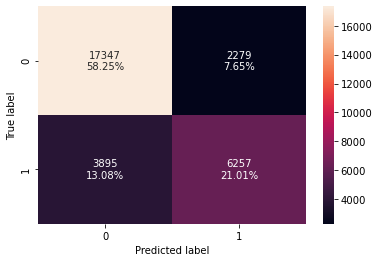

In [375]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train3, y_train1)

### The confusion matrix

True Positives (TP): we correctly predicted that they will cancel the booking and they actually cancelled are 6257 or 21.01%

True Negatives (TN): we correctly predicted that they will not cancel the booking  and they did not cancel are 17347 or 58.25%

False Positives (FP): we incorrectly predicted that they they will cancel the booking and they actually did not cancelled are (a "Type I error") 2279 or 7.65%  Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not cancel the booking  and they actually cancel (a "Type II error") 3895 or 13.08% Falsely predict negative Type II error

In [376]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train3, y_train1
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.792666  0.616332   0.733013  0.669628

### ROC - AUC
ROC-AUC on training set

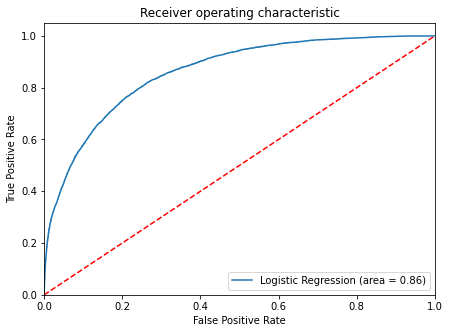

In [377]:
logit_roc_auc_train = roc_auc_score(y_train1, lg2.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train1, lg2.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is an ok recall and ROC-AUC score.

### Model Performance Improvement
Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.
### Optimal threshold using AUC-ROC curve

In [378]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train1, lg2.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2958216905707305


### Checking model performance on training set

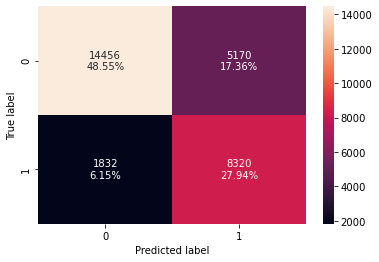

In [379]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train3, y_train1, threshold=optimal_threshold_auc_roc
)

In [380]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train3, y_train1, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0   0.76486  0.819543   0.616753  0.703832

- Model performance has improved significantly.
- Model is giving a recall of 0.82 as compared to initial model which was giving a recall of 0.73.
- Precision has not decreased much from 0.62 to 0.62.

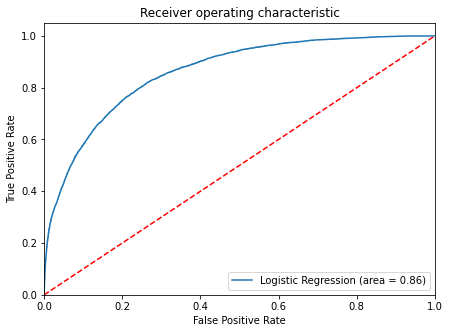

In [381]:
logit_roc_auc_train = roc_auc_score(y_train1, lg2.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train1, lg2.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Let's use Precision-Recall curve and see if we can find a better threshold

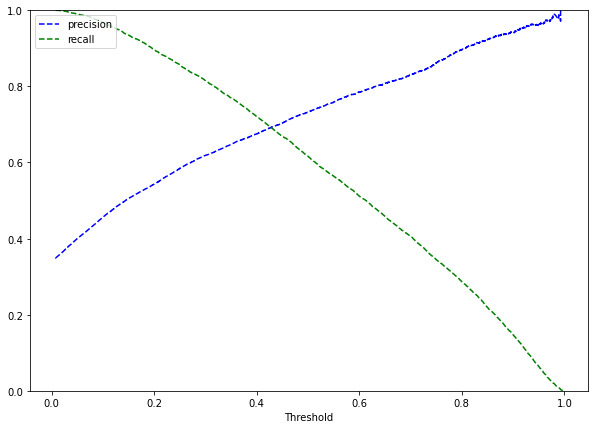

In [382]:
y_scores = lg2.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train1, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.42 we will get equal precision and recall but taking a step back and selecting value around 0.40 will provide a higher recall and a good precision.

### Checking model performance on training set

In [397]:
# setting the threshold
optimal_threshold_curve = 0.40

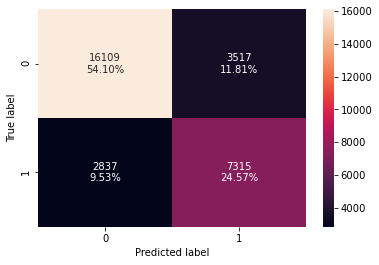

In [398]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train3, y_train1, threshold=optimal_threshold_curve)

In [399]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train3, y_train1, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.786621  0.720548   0.675314  0.697198

- Recall has decreased as compared to the initial model.
- Model is giving a better performance with 0.296 threshold found using AUC-ROC curve.

### Model Performance Summary

In [401]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.296 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.296 Threshold  \
Accuracy                      0.792666                             0.764860   
Recall                        0.616332                             0.819543   
Precision                     0.733013                             0.616753   
F1                            0.669628                             0.703832   

           Logistic Regression-0.40 Threshold  
Accuracy                             0.786621  
Recall                               0.720548  
Precision                            0.675314  
F1                                   0.697198

### Let's check the performance on the test set

- Dropping the columns from the test set that were dropped from the training set

In [402]:
X_test3 = X_test1[X_train3.columns].astype(float)

### Using model with default threshold

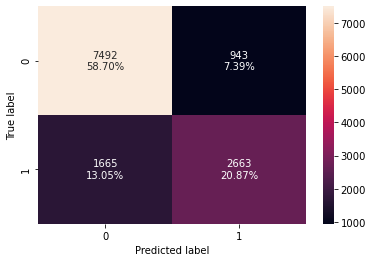

In [403]:
confusion_matrix_statsmodels(lg2, X_test3, y_test1)

In [404]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test3, y_test1
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.795659  0.615296   0.738491  0.671288

- ROC curve on test set

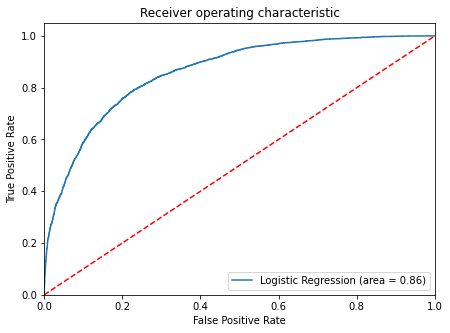

In [405]:
logit_roc_auc_train = roc_auc_score(y_test1, lg2.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test1, lg2.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Using model with threshold=0.296

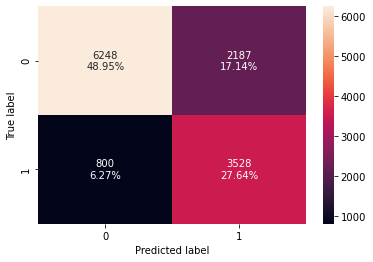

In [406]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test3, y_test1, threshold=optimal_threshold_auc_roc)

In [407]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test3, y_test1, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.765964  0.815157   0.617323  0.702579

### Using model with threshold=0.40

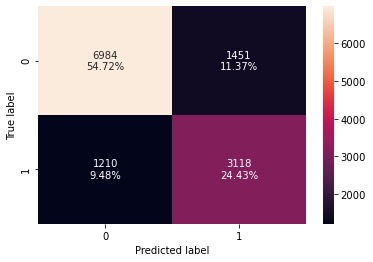

In [408]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test3, y_test1, threshold=optimal_threshold_curve)

The confusion matrix

True Positives (TP): we correctly predicted that they will cancel the booking and they actually cancelled are 3118 or 24.43%

True Negatives (TN): we correctly predicted that they will not cancel the booking  and they did not cancel are 6984 or 54.72%

False Positives (FP): we incorrectly predicted that they they will cancel the booking and they actually did not cancelled are (a "Type I error") 1451 or 11.37%  Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not cancel the booking  and they actually cancel (a "Type II error") 1210 or 9.48% Falsely predict negative Type II error

In [409]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test3, y_test1, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision       F1
0  0.791507  0.720425   0.682425  0.70091

## Model performance summary

In [410]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.29 Threshold  \
Accuracy                      0.792666                            0.764860   
Recall                        0.616332                            0.819543   
Precision                     0.733013                            0.616753   
F1                            0.669628                            0.703832   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.786621  
Recall                               0.720548  
Precision                            0.675314  
F1                                   0.697198

In [412]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.29 Threshold  \
Accuracy                      0.795659                            0.765964   
Recall                        0.615296                            0.815157   
Precision                     0.738491                            0.617323   
F1                            0.671288                            0.702579   

           Logistic Regression-0.40 Threshold  
Accuracy                             0.791507  
Recall                               0.720425  
Precision                            0.682425  
F1                                   0.700910

### Observations:
- The training and testing recall are 61.32% and 61.51% respectively.

-  Recall on the train and test sets are comparable.
- This shows that the model is giving a generalised result.

## Final Model Summary

**We'll consider the features in *X_train3* as the final ones and *lg2* as final model and threshold of 0.29 as final**

### Using model with threshold=0.296

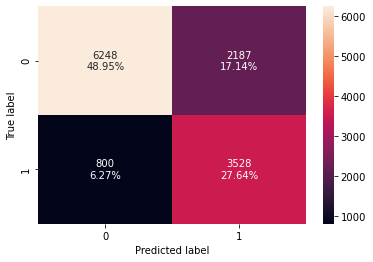

In [413]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test3, y_test1, threshold=optimal_threshold_auc_roc)

## The confusion matrix

True Positives (TP): we correctly predicted that they will cancel the booking and they actually cancelled are 3528 or 27.64%

True Negatives (TN): we correctly predicted that they will not cancel the booking  and they did not cancel are 6248 or 48.95%

False Positives (FP): we incorrectly predicted that they they will cancel the booking and they actually did not cancelled are (a "Type I error") 12187 or 17.14%  Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not cancel the booking  and they actually cancel (a "Type II error") 800 or 6.27% Falsely predict negative Type II error

In [414]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test3, y_test1, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.765964  0.815157   0.617323  0.702579

## Model performance evaluation

### Conclusion
- All the models are giving a generalized performance on training and test set.
- The highest recall is 81.52% on the training set.
- Using the model with default threshold the model will give a low recall and good precision scores - - This model will help the hotel save resources but lose on potential customers.
- Using the model with 0.296 threshold the model will give a a balance recall and precision score - - This model will help the bank to maintain a balance in identifying potential customer and the cost of resources.
- Using the model with 0.40 threshold the model will give a a low recall and good precision scores - -- This model will help the hotel save resources but lose on potential customers.

### Recommendations
- From our logistic regression model we identified that 
- lead_time: The odds of a customer who has a more days in lead time, cancelling booking is greater.
- avg_price_per_room: change in avg_price_per_room will increase the odds of a customer cancelling booking.
- no_of_special_requests: A customer with no_of_special_requests is less likely to cancelling booking.
- market_segment_type_Online: A customer who booked online is more likely to cancel booking by.
- market_segment_type_Offline: A customer who booked offline is less likely to cancel the booking.
- Bookings done for yearly quarter 3 and 4 are less likely to be cancelled.
- Bookings done for room type 2,4,5, 6,7 are less likely to be cancelled.

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Building a Decision Tree model

## Decision Tree model

 We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

We can pass a dictionary {0:0.34,1:0.66} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

In [415]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [416]:
model = DecisionTreeClassifier(
    criterion="gini",  random_state=1  #, class_weight={0: 0.34, 1: 0.66}
)

### Split Data

In [417]:
# Splitting the target from predictors
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

In [418]:
X = X.drop(['no_of_children','repeated_guest',"required_car_parking_space",'no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1)

In [419]:
X = pd.get_dummies(X, drop_first = True)
X.head()

no_of_adults  no_of_weekend_nights  no_of_week_nights  lead_time  \
0             2                     1                  2        224   
1             2                     2                  3          5   
2             2                     2                  1          1   
3             2                     0                  2        211   
4             2                     0                  3        277   

   avg_price_per_room  no_of_special_requests  Day of the Week  \
0               65.00                       0                0   
1              106.68                       1                1   
2               60.00                       0                2   
3              100.00                       0                6   
4               89.10                       2                5   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  yearly_quarter_2017Q4  yearly_quarter_2018Q1  \
0                           0                      1                      0   
1                           1                      0                      0   
2                           1                      0                      1   
3                           1                      0                      0   
4                           1                      0                      0   

   yearly_quarter_2018Q2  yearly_quarter_2018Q3  yearly_quarter_2018Q4  \
0                      0                      0                      0   
1                      0                      0                      1   
2         

In [420]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [421]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [422]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

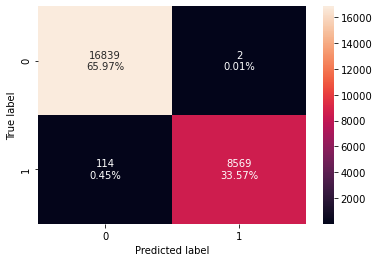

In [423]:
confusion_matrix_sklearn(model, X_train, y_train)

In [424]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.986870897155361


- Model is able to perfectly classify all the data points on the training set.
- 99% recall on the training set, each sample has been classified correctly.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
- This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

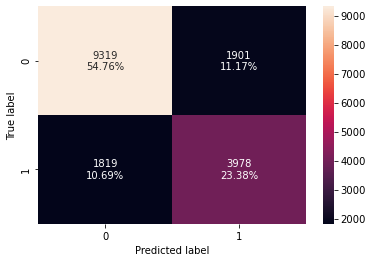

In [425]:
confusion_matrix_sklearn(model, X_test, y_test)

In [426]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.6862170087976539


There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiitting

### Visualizing the Decision Tree

In [427]:
feature_names = X_train.columns.to_list()

In [428]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 88.50
|   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |--- avg_price_per_room <= 89.05
|   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |   |--- yearly_quarter_2019Q3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [469.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- yearly_quarter_2019Q3 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 2.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  2.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- no_of_week

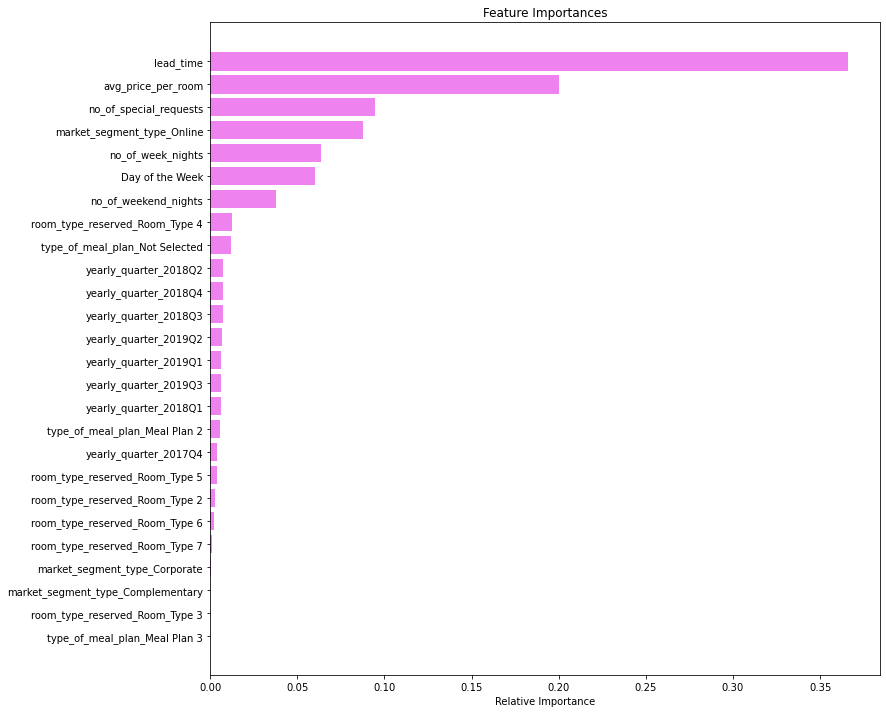

In [429]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead_time is the most important variable for predicting the booking_status.
* avg_price_per_room is second most important and
* no_of_special_requests is third most special request.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [430]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, )#class_weight={0: 0.34, 1: 0.66}

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

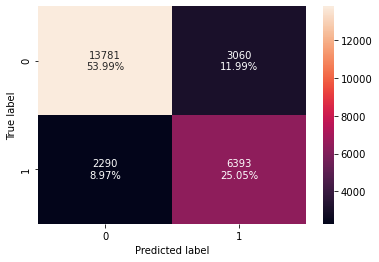

In [431]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [432]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.7362662674190947


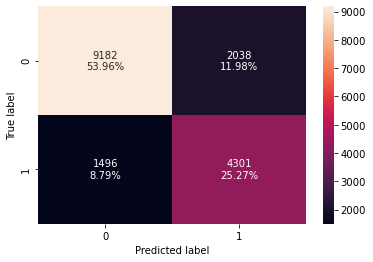

In [433]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [434]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.7419354838709677


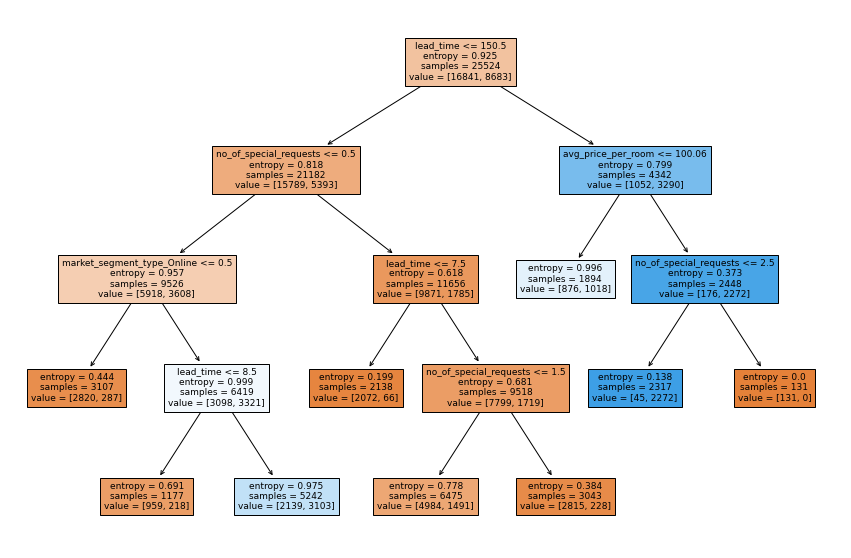

In [435]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [436]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [2820.00, 287.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 8.50
|   |   |   |   |--- weights: [959.00, 218.00] class: 0
|   |   |   |--- lead_time >  8.50
|   |   |   |   |--- weights: [2139.00, 3103.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- lead_time <= 7.50
|   |   |   |--- weights: [2072.00, 66.00] class: 0
|   |   |--- lead_time >  7.50
|   |   |   |--- no_of_special_requests <= 1.50
|   |   |   |   |--- weights: [4984.00, 1491.00] class: 0
|   |   |   |--- no_of_special_requests >  1.50
|   |   |   |   |--- weights: [2815.00, 228.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.06
|   |   |--- weights: [876.00, 1018.00] class: 1
|   |--- avg_price_per_room >  100.06
|   |   |--- no_of_special_requests <= 2.50
|   |   |   |--- weights: [45.00, 2272.00] 

In [437]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                        Imp
lead_time                          0.479674
no_of_special_requests             0.253208
market_segment_type_Online         0.177435
avg_price_per_room                 0.089684
no_of_weekend_nights               0.000000
market_segment_type_Complementary  0.000000
yearly_quarter_2019Q2              0.000000
yearly_quarter_2019Q1              0.000000
yearly_quarter_2018Q4              0.000000
yearly_quarter_2018Q3              0.000000
yearly_quarter_2018Q2              0.000000
yearly_quarter_2018Q1              0.000000
yearly_quarter_2017Q4              0.000000
market_segment_type_Corporate      0.000000
room_type_reserved_Room_Type 6     0.000000
room_type_reserved_Room_Type 7     0.000000
no_of_week_nights                  0.000000
room_type_reserved_Room_Type 5     0.000000
room_type_reserved_Room_Type 4     0.000000
room_type_reserved_Room_Type 3     0.000000
room_type_reserved_Room_Type 2     0.000000
type_of_meal_plan_Not Selected  

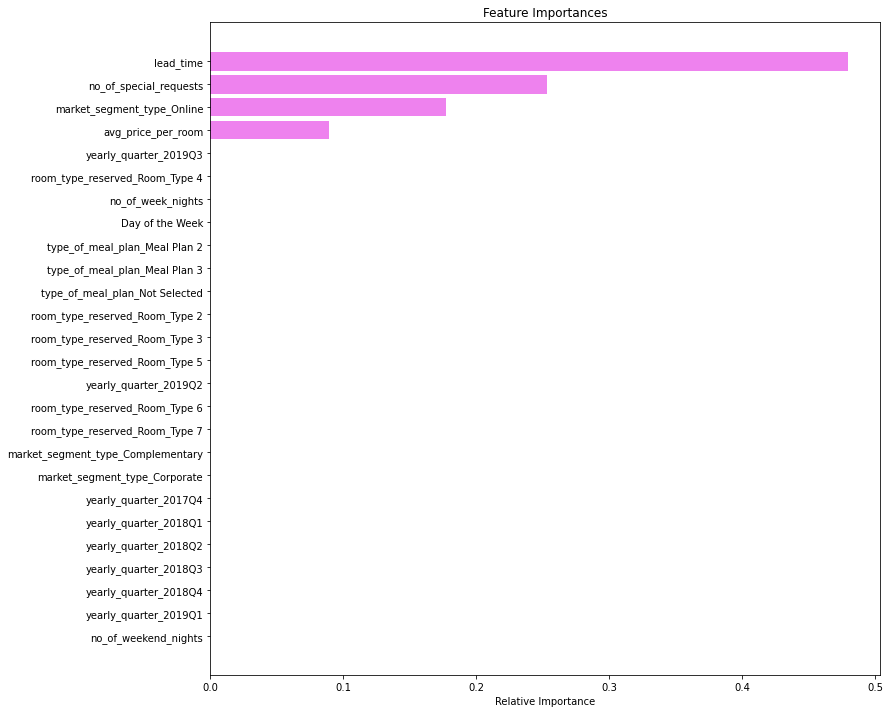

In [438]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [439]:
clf = DecisionTreeClassifier(random_state=1,)# class_weight={0: 0.34, 1: 0.66}
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [440]:
pd.DataFrame(path)

ccp_alphas  impurities
0       0.000000    0.004662
1       0.000000    0.004662
2       0.000000    0.004662
3       0.000000    0.004662
4       0.000000    0.004662
...          ...         ...
1908    0.009342    0.301661
1909    0.012485    0.314146
1910    0.012767    0.326913
1911    0.025269    0.377452
1912    0.071469    0.448921

[1913 rows x 2 columns]

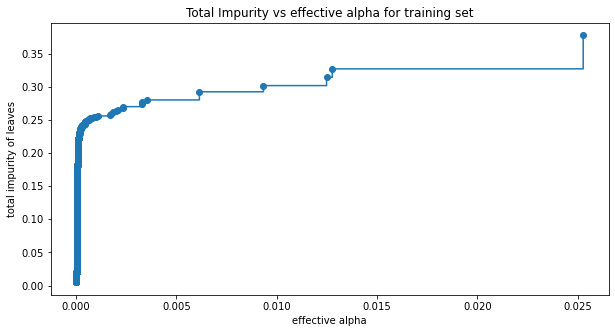

In [441]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [442]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, #class_weight={0: 0.34, 1: 0.66}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07146926305599077


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

In [443]:
ccp_alpha

0.07146926305599077

In [444]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07146926305599077


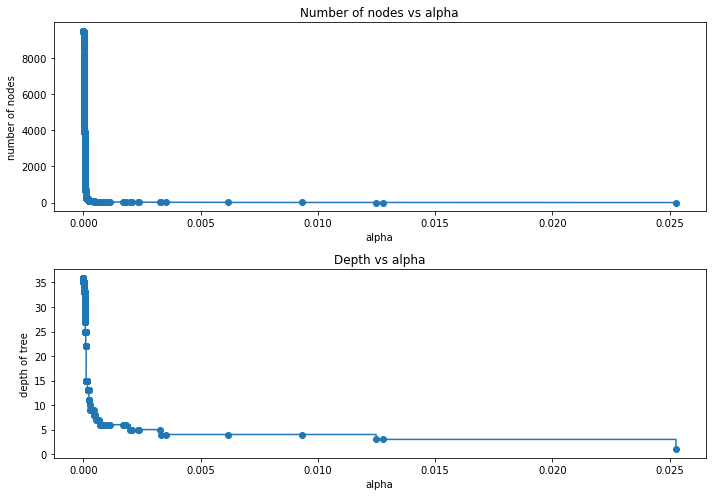

In [445]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [446]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [447]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [448]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

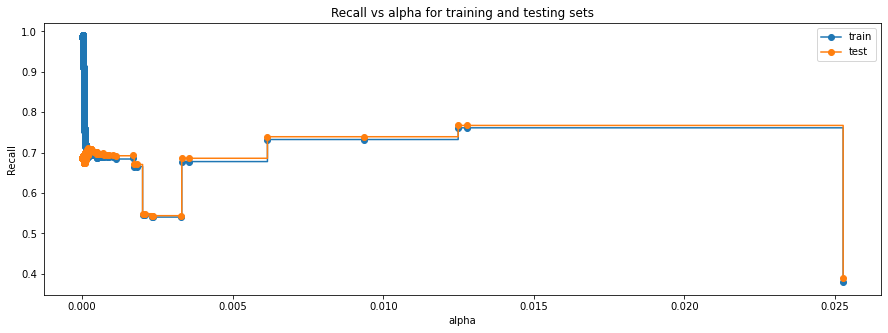

In [449]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.025 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.0124 retaining information and getting higher recall.**

In [450]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.012484589094136092, random_state=1)


In [451]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012484589094136092, random_state=1)

### Checking performance on training set

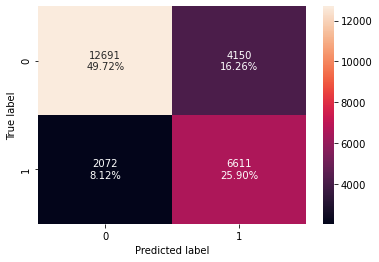

In [452]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [453]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.7613727974202464


### Checking performance on testing set

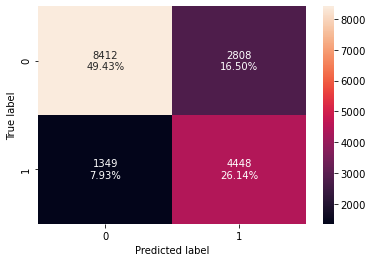

In [454]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [455]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.7672934276349836


* Recall of testing data set: 0.7673 and training data set;0.7613 is compareble.

## Visualizing the Decision Tree

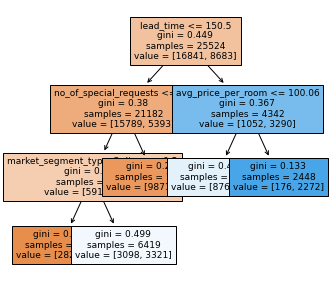

In [456]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- This decision tree is too simple so a buisness would not be able to use it to actually predict the booking status.

### Creating model with 0.003 ccp_alpha

In [458]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha= 0.003, random_state=1 #class_weight={0: 0.15, 1: 0.85}
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=1)

### Checking performance on the training set

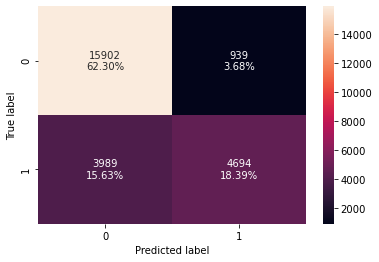

In [459]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [460]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.5405965680064494


### Checking performance on the testing set

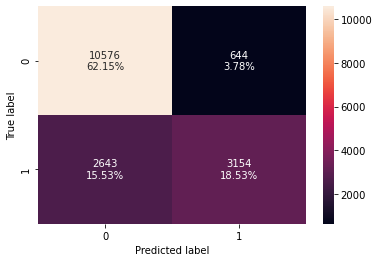

In [461]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [462]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.5440745213041228


- The results have improved from the initial model.
- The performance is comparable to the hyperparameter tuned model.
- The model is giving a generalized performance on training and test set.

## Visualizing the Decision Tree

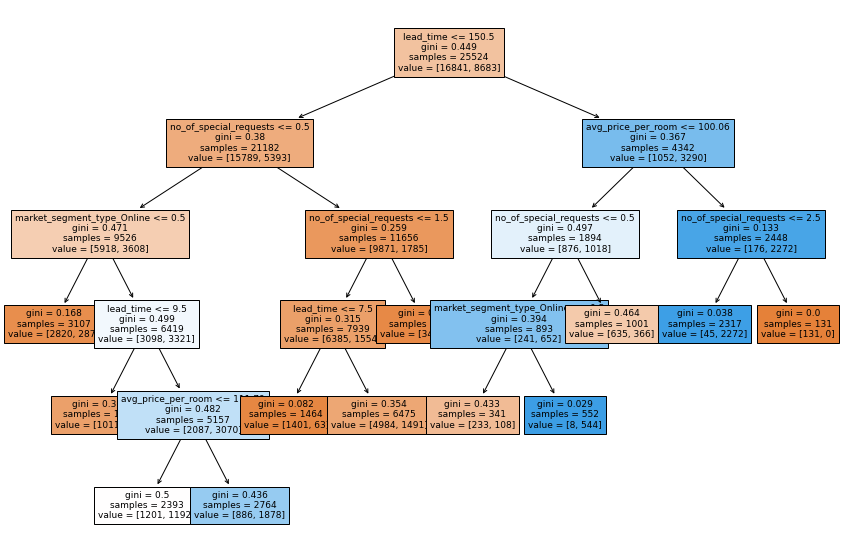

In [463]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [464]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [2820.00, 287.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- weights: [1011.00, 251.00] class: 0
|   |   |   |--- lead_time >  9.50
|   |   |   |   |--- avg_price_per_room <= 111.79
|   |   |   |   |   |--- weights: [1201.00, 1192.00] class: 0
|   |   |   |   |--- avg_price_per_room >  111.79
|   |   |   |   |   |--- weights: [886.00, 1878.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- lead_time <= 7.50
|   |   |   |   |--- weights: [1401.00, 63.00] class: 0
|   |   |   |--- lead_time >  7.50
|   |   |   |   |--- weights: [4984.00, 1491.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [3486.00, 231.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.06
|   |   

In [465]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
lead_time                          0.487265
no_of_special_requests             0.216185
market_segment_type_Online         0.206779
avg_price_per_room                 0.089771
no_of_weekend_nights               0.000000
market_segment_type_Complementary  0.000000
yearly_quarter_2019Q2              0.000000
yearly_quarter_2019Q1              0.000000
yearly_quarter_2018Q4              0.000000
yearly_quarter_2018Q3              0.000000
yearly_quarter_2018Q2              0.000000
yearly_quarter_2018Q1              0.000000
yearly_quarter_2017Q4              0.000000
market_segment_type_Corporate      0.000000
room_type_reserved_Room_Type 6     0.000000
room_type_reserved_Room_Type 7     0.000000
no_of_week_nights                  0.000000
room_type_reserved_Room_Type 5     0.000000
room_type_reserved_Room_Type 4     0.000000
room_type_reserved_Room_Type 3     0.000000
room_type_reserved_Room_Type 2     0.000000
type_of_meal_plan_Not Selected  

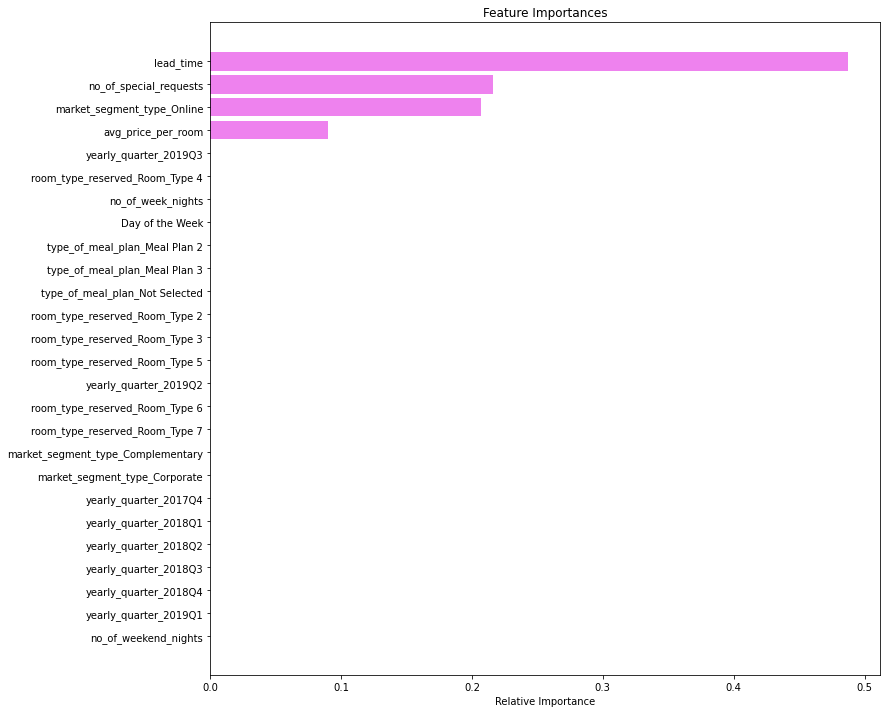

In [466]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- lead_time and no_of_special_requests are the top two important features to predict customer booking_status.

## Do we need to prune the tree?

- Recall on both training set :  and testing set are comparable. 
- The tree is neither too complex nor too simple so can be used for decision making.
- We will procede with models performance comparison.

## Model Performance Comparison and Conclusions

In [467]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                0.986871
1                0.736266
2                0.540597

In [468]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.686217
1               0.741935
2               0.544075

- Decision tree model with pre-pruning has given the best recall score on training data.
- The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

## Conclusions

- We analyzed the "Booking cancellation status" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to cancel the booking or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- lead_time ,no_of_special_requests ,market_segment_type_Online, avg_price_per_room are the most important variable in predicting the customers that will cancel the booking or not. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations

* According to the decision tree model - 

    a) If a customer books with lead time less than 150 days and number of special requests is less than ~5 with the market segment online,  then there is a very high chance that the customer is going to cancel the booking.
    b) If the room price >100 and number of special requests is greater than 2.5 then customer is less likely to cancel the booking.


* Potential Customers - Employ the predictive model to predict potential customers (customers who can book the room), Offer limited-time coupons/discounts on a real-time basis only to those customers. This can also be employed for the customers in months like July, August, April May, as in those months, the traffic is higher so these months have potential confirming customers.

* It is observed that less cancellations are seen on the Wednesday, Tuesday and Sunday, While there is comparitively more  traffic and revenue sessions on special days - the website should initiate schemes/offers on the special days to attract more customers on such days.

* May and November were the months where the website saw the highest traffic with further data it should be investigated what portfolios were running in those months and an inspiration to create more such portfolios can be drawn and implemented.

* Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided.

* Better resource management - Regular days (Non-weekend) days is when the website sees the most traffic, resources such as customer care services can be allocated more for these days.

* Website should be made more friendly, easily accessible, and feasible for other operating systems and browsers as new visitors seem to struggle with administrative pages.

* Site Engagement - Version of the site for slower-internet users, Consistent and user-friendly mobile website design for more browsers and operating systems.